### Libraries

In [59]:
library(ggplot2)
library(geosphere)
library(mapproj)
library(ggmap)
library(dplyr)
library(tidyr)
library(stringr)
library(mgcv)

### Importing Data

In [60]:
# em_oc <- read.csv('occupation.csv')
# em_co <- read.csv('countryT.csv')
# em_pr <- read.csv('province.csv')
# em_ca <- read.csv('categoryT.csv')


em_oc <- read.csv('em_oc.csv') 
em_co <- read.csv('em_co.csv')
em_pr <- read.csv('em_pr.csv')
em_ca <- read.csv('em_ca.csv')
em_co_lat_long <- read.csv('em_co_lat_long.csv')

In [61]:
em_pr <- em_pr[-1]
em_co <- em_co[-1]
em_ca <- em_ca[-1]
em_oc <- em_oc[-1]
em_co_lat_long <- em_co_lat_long[-1]

In [62]:
# #cleaning occupation data
# em_oc <- em_oc %>% filter(!is.na(Year)) %>% select(-X)
# #cleaning province data
# em_pr <- em_pr %>% filter(!is.na(year)) %>% select(year:total)
# #cleaning name of em_co 
# names(em_co)[1] <- 'Year'

In [65]:
df <- read.csv('r_project_cleaned.csv', stringsAsFactors=FALSE)

In [66]:
df$sa_isl_month <- factor(df$sa_isl_month, levels=c('muharram', 'safar', 'rabi al-awwal', 'rabi ath-thani', 'jumada al-ula', 'jumada al-akhira', 'rajab', 'shaban', 'ramadan', 'shawal', 'dhu al-qadah', 'dhu al-hijjah'))
df$sa_Time <- factor(df$sa_Time, levels=c('Morning', 'Afternoon', 'Evening', 'Night'))
df$gr_week_day <- factor(df$gr_week_day, levels=c('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))

In [67]:
str(df)

'data.frame':	847 obs. of  35 variables:
 $ X                       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date                    : chr  "1995-11-19" "2000-11-06" "2002-05-08" "2002-06-14" ...
 $ sa_Blast.Day.Type       : chr  "Holiday" "Working Day" "Working Day" "Working Day" ...
 $ sa_Time                 : Factor w/ 4 levels "Morning","Afternoon",..: NA NA 1 1 NA 2 NA 2 3 NA ...
 $ sa_City                 : chr  "islamabad" "karachi" "karachi" "karachi" ...
 $ sa_Latitude             : num  33.7 25 25 25 30.2 ...
 $ sa_Longitude            : num  73.1 67 67 67 67 ...
 $ sa_Province             : chr  "Capital" "Sindh" "Sindh" "Sindh" ...
 $ sa_Location.Category    : chr  "Foreign" "Office Building" "Hotel" "Foreign" ...
 $ sa_Open.Closed.Space    : chr  "Closed" "Closed" "Closed" "Closed" ...
 $ sa_Target.Type          : chr  "Foreigner" "Media" "Foreigner" "Foreigner" ...
 $ sa_Targeted.Sect.if.any : chr  "None" "None" "Christian" "Christian" ...
 $ sa_Killed.Max           : int  15 

In [9]:
df

X   Date       sa_Blast.Day.Type sa_Time   sa_City                  
1    1  1995-11-19 Holiday           NA        islamabad                
2    2  2000-11-06 Working Day       NA        karachi                  
3    3  2002-05-08 Working Day       Morning   karachi                  
4    4  2002-06-14 Working Day       Morning   karachi                  
5    5  2003-07-04 Working Day       NA        quetta                   
6    6  2003-12-25 Holiday           Afternoon rawalpindi               
7    7  2004-02-28 Working Day       NA        rawalpindi               
8    8  2004-05-07 Working Day       Afternoon karachi                  
9    9  2004-05-31 Working Day       Evening   karachi                  
10  10  2004-06-03 Working Day       NA        north waziristan         
11  11  2004-06-18 NA                NA        NA                       
12  12  2004-07-28 Working Day       Evening   kohat                    
13  13  2004-07-30 Working Day       Evening   attock                   
14  14  2004-10-01 Working Day       Afternoon sialkot                  
15  15  2004-10-10 Holiday           Evening   lahore                   
16  16  2005-03-19 Working Day       Afternoon quetta                   
17  17  2005-04-28 Working Day       NA        swat                     
18  18  2005-05-08 NA                NA        NA                       
19  19  2005-05-27 Working Day       Morning   islamabad                
20  20  2005-05-30 Working Day       Evening   karachi                  
21  21  2005-12-01 NA                NA        NA                       
22  22  2006-01-06 NA                NA        NA                       
23  23  2006-01-13 NA                NA        NA                       
24  24  2006-02-09 Holiday           Morning   hangu                    
25  25  2006-03-02 Working Day       Morning   karachi                  
26  26  2006-04-12 Holiday           Evening   karachi                  
27  27  2006-06-02 Working Day       Morning   bannu                    
28  28  2006-06-26 Working Day       Afternoon north waziristan         
29  29  2006-08-06 Holiday           Morning   lasbela                  
30  30  2006-10-30 NA                NA        NA                       
⋮   ⋮   ⋮          ⋮                 ⋮         ⋮                        
818 818 2016-11-12 Weekend           Evening   khuzdar                  
819 819 2016-11-26 Weekend           Morning   mohmand agency           
820 820 2017-02-07 Working Day       Morning   bannu                    
821 821 2017-02-13 Working Day       Evening   lahore                   
822 822 2017-02-15 Working Day       Morning   ghallanai, mohmand agency
823 823 2017-02-15 Working Day       Afternoon hayatabad                
824 824 2017-02-15 Working Day       Morning   mosal kor, mohmand agency
825 825 2017-02-16 Working Day       Evening   sehwan town              
826 826 2017-02-21 Working Day       Morning   tangi, charsadda district
827 827 2017-03-02 NA                NA        NA                       
828 828 2017-04-05 Working Day       Morning   lahore                   
829 829 2017-04-26 NA                NA        NA                       
830 830 2017-05-12 Working Day       Afternoon quetta                   
831 831 2017-05-20 Weekend           NA        kohat                    
832 832 2017-05-24 NA                NA        NA                       
833 833 2017-06-12 NA                NA        NA                       
834 834 2017-06-23 Working Day       Afternoon quetta                   
835 835 2017-07-03 NA                NA        NA                       
836 836 2017-07-10 Working Day       Morning   chaman                   
837 837 2017-07-17 Working Day       NA        peshawar                 
838 838 2017-07-17 Working Day       NA        peshawar                 
839 839 2017-07-24 Working Day       Afternoon lahore                   
840 840 2017-08-12 Weekend           Evening   quetta         

### Visualizations

In [35]:
sa <- df %>% filter(sa==1) %>% group_by(sa_Province) %>% summarise(sav = sum(sa_Killed.Max, na.rm=T))
da <- df %>% filter(da==1) %>% group_by(da_Province) %>% summarise(dav = sum(da_Total.Died.Max, na.rm=T))
sada <- merge(sa, da, by.x='sa_Province', by.y='da_Province', all=T) %>% gather('type', 'val', -sa_Province) 
l <- sada %>% filter(type=='sav') %>% arrange(desc(val)) %>% select(sa_Province) %>% unlist()
sada$sa_Province <- factor(sada$sa_Province, levels=l)

In [36]:
levels(sada$sa_Province)

[1] "KPK"         "Punjab"      "Balochistan" "FATA"        "Sindh"      
[6] "Capital"     "AJK"

Warning message:
In mean.default(X[[i]], ...): argument is not numeric or logical: returning NAWarning message:
In mean.default(X[[i]], ...): argument is not numeric or logical: returning NAWarning message:
In mean.default(X[[i]], ...): argument is not numeric or logical: returning NAWarning message:
In mean.default(X[[i]], ...): argument is not numeric or logical: returning NAWarning message:
In mean.default(X[[i]], ...): argument is not numeric or logical: returning NAWarning message:
In mean.default(X[[i]], ...): argument is not numeric or logical: returning NAWarning message:
In mean.default(X[[i]], ...): argument is not numeric or logical: returning NAWarning message:
In mean.default(X[[i]], ...): argument is not numeric or logical: returning NAWarning message:
In mean.default(X[[i]], ...): argument is not numeric or logical: returning NAWarning message:
In mean.default(X[[i]], ...): argument is not numeric or logical: returning NAWarning message:
In mean.default(X[[i]], ...): arg

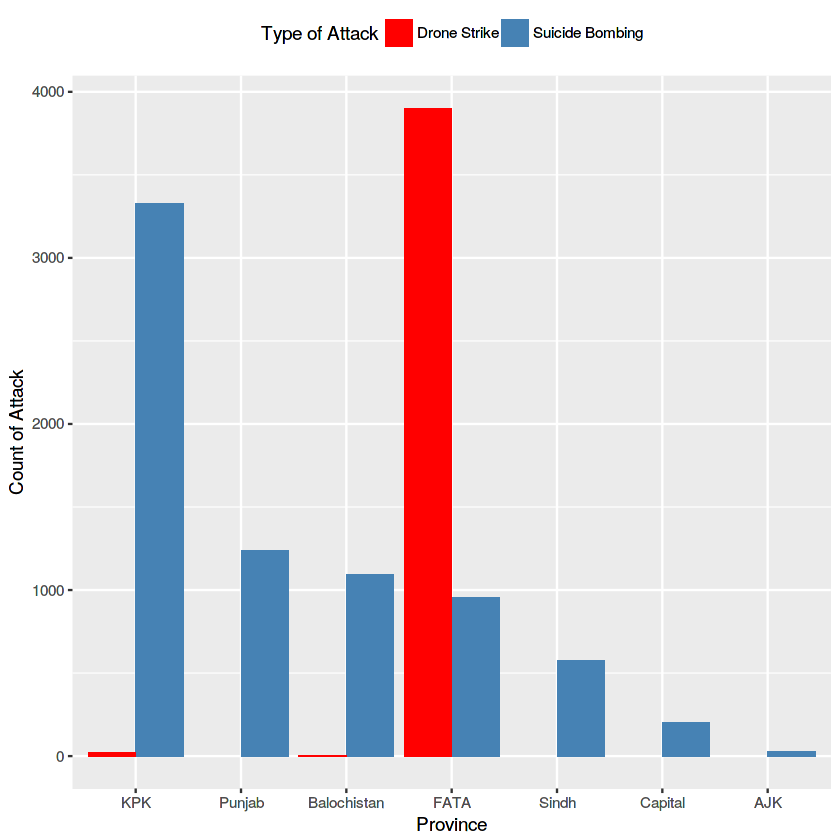

In [46]:
ggplot(sada) +
geom_bar(aes(x=reorder(sa_Province, type), y=val, fill=type), stat='identity', position='dodge') +
scale_fill_manual(name='Type of Attack', values=c('red', 'steelblue'), labels=c('Drone Strike', 'Suicide Bombing')) +
labs(x='Province', y='Count of Attack') +
theme(legend.position='top')




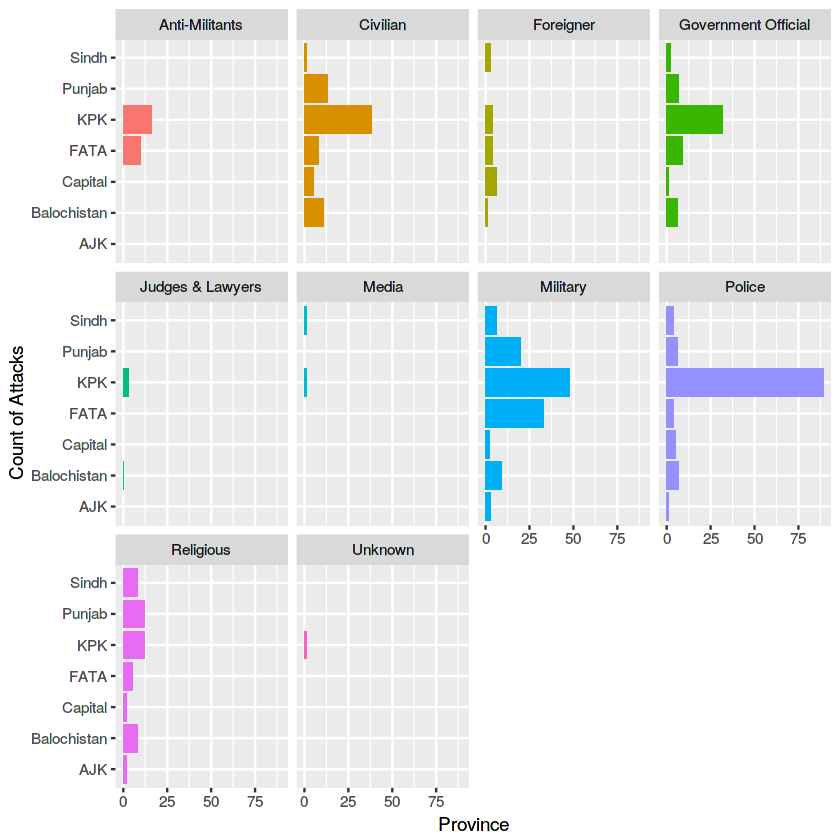

In [55]:
df %>% filter(sa==1) %>% group_by(sa_Target.Type, sa_Province) %>% summarise(cnt=sum(sa_No..of.Suicide.Blasts, na.rm=T)) %>% 
ggplot() +
geom_bar(aes(x=sa_Province, y=cnt, fill=sa_Target.Type), stat='identity') + 
facet_wrap(~sa_Target.Type) + 
coord_flip() + 
theme(legend.position='none') + 
labs(x='Count of Attacks', y='Province')

In [235]:
df %>% filter(da==1) %>% group_by(da_Province) %>% summarise(sum(da_Total.Died.Max, na.rm=T))

da_Province sum(da_Total.Died.Max, na.rm = T)
1 Balochistan    2                             
2 FATA        3902                             
3 KPK           22

In [58]:
df %>% filter(sa==1) %>% group_by(gr_year, gr_month) %>% summarise(val=sum(sa_No..of.Suicide.Blasts, na.rm=TRUE))

gr_year gr_month val
1   1995    11        2 
2   2000    11        1 
3   2002     5        1 
4   2002     6        1 
5   2003     7        1 
6   2003    12        2 
7   2004     2        1 
8   2004     5        2 
9   2004     6        1 
10  2004     7        3 
11  2004    10        2 
12  2005     3        1 
13  2005     4        1 
14  2005     5        2 
15  2006     2        1 
16  2006     3        1 
17  2006     4        1 
18  2006     6        2 
19  2006     8        1 
20  2006    11        2 
21  2006    12        1 
22  2007     1        4 
23  2007     2        4 
24  2007     3        1 
25  2007     4        1 
26  2007     5        2 
27  2007     7       13 
28  2007     8        9 
29  2007     9        8 
30  2007    10        5 
⋮   ⋮       ⋮        ⋮  
109 2014    10       0  
110 2014    11       0  
111 2014    12       0  
112 2015     1       0  
113 2015     2       0  
114 2015     3       0  
115 2015     5       0  
116 2015     6       0  
117 2015     7       0  
118 2015     8       0  
119 2015     9       1  
120 2015    10       2  
121 2015    12       0  
122 2016     1       2  
123 2016     2       1  
124 2016     3       2  
125 2016     4       2  
126 2016     5       1  
127 2016     8       0  
128 2016     9       2  
129 2016    10       2  
130 2016    11       5  
131 2017     2       8  
132 2017     4       0  
133 2017     5       1  
134 2017     6       3  
135 2017     7       4  
136 2017     8       1  
137 2017    10       2  
138 2017    11       3

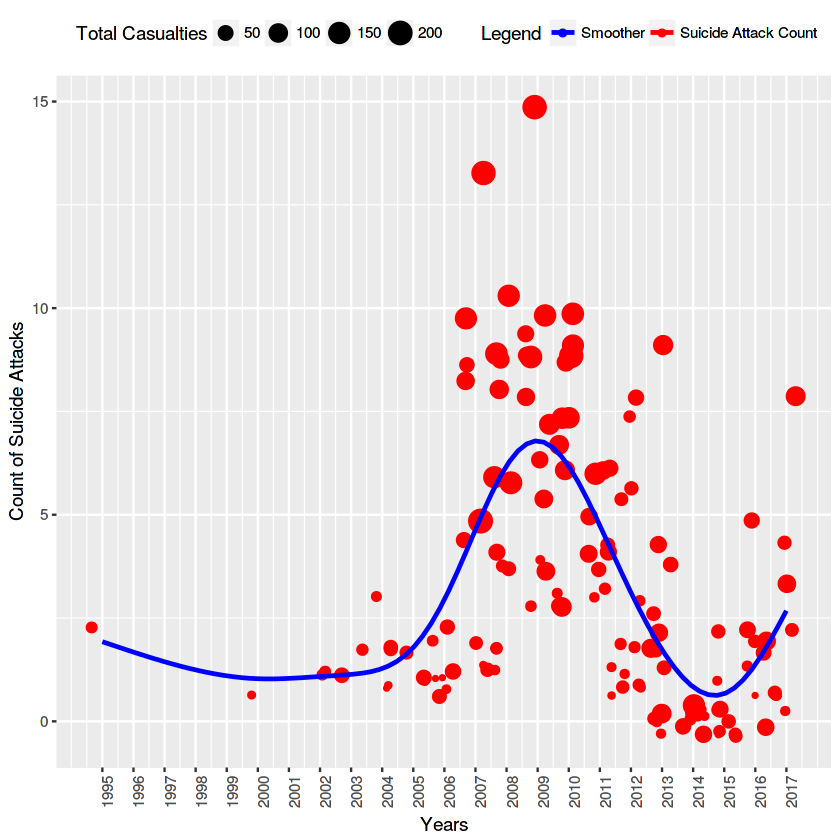

In [124]:
df %>% filter(sa==1) %>% group_by(gr_year, gr_month) %>% summarise(cnt=sum(sa_No..of.Suicide.Blasts, na.rm=TRUE), dead=sum(sa_Killed.Max, na.rm=TRUE)) %>% 
ggplot() + geom_point(aes(x=gr_year, y=cnt, color='Suicide Attack Count', size=dead), position='jitter') + geom_smooth(aes(x=gr_year, y=cnt, color='Smoother'), method='gam', formula=y~s(x), se=FALSE) + 
labs(x='Years', y='Count of Suicide Attacks', size='Total Casualties') +
scale_color_manual(name='Legend', values=c('blue', 'red')) + theme(legend.position='top',axis.text.x = element_text(angle=90)) +
scale_x_continuous(breaks=seq(1995,2017,1))

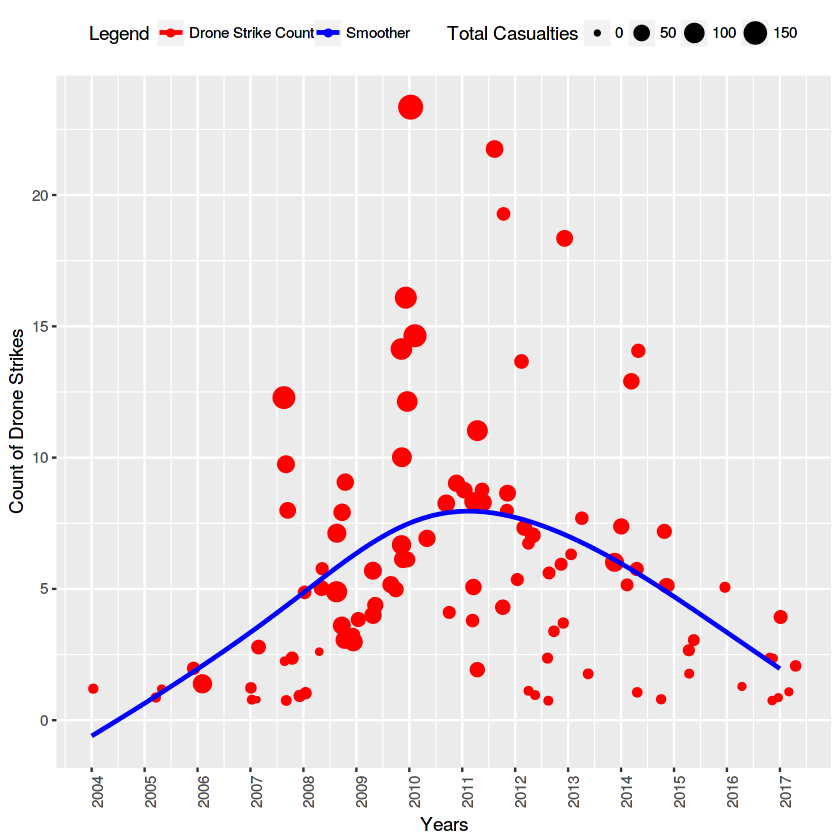

In [127]:
df %>% filter(da==1) %>% group_by(gr_year, gr_month) %>% summarise(val=sum(da_No.of.Strike, na.rm=TRUE), dead=sum(da_Total.Died.Max, na.rm=TRUE)) %>% 
ggplot() + geom_point(aes(x=gr_year, y=val, size=dead, color='Drone Strike Count'), position='jitter') + geom_smooth(aes(x=gr_year, y=val, color='Smoother'), method='gam', formula=y~s(x), se=FALSE) + 
labs(x='Years', y='Count of Drone Strikes', size='Total Casualties') +
scale_color_manual(name='Legend', values=c('red', 'blue')) + theme(legend.position='top',axis.text.x = element_text(angle=90)) +
scale_x_continuous(breaks=seq(2004,2017,1))

`geom_smooth()` using method = 'loess'


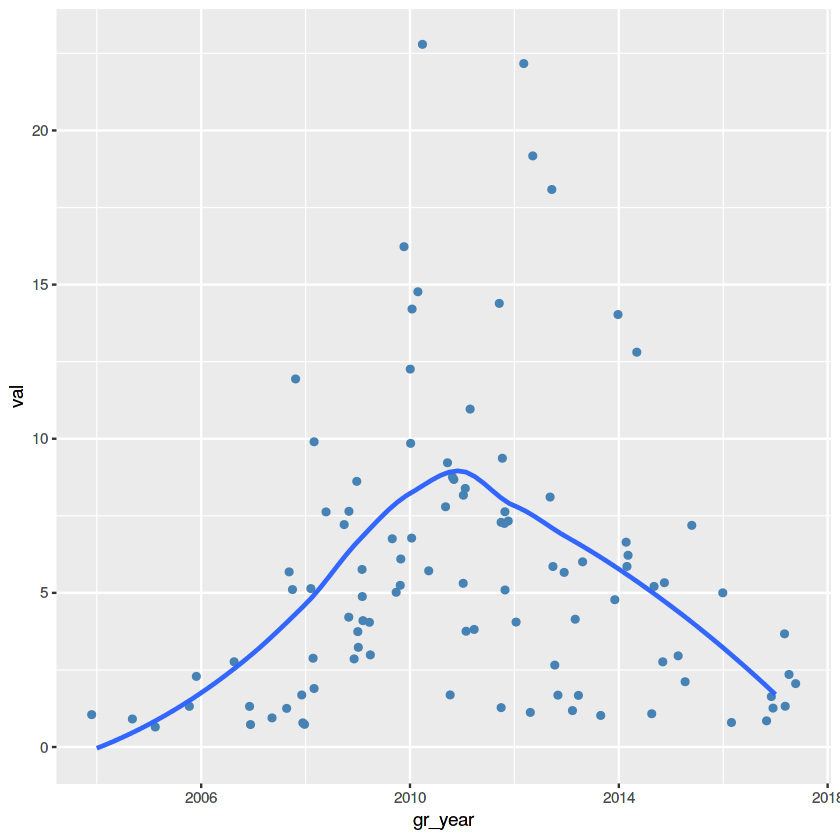

In [19]:
df %>% filter(da==1) %>% group_by(gr_year, gr_month) %>% summarise(val=sum(da_No.of.Strike, na.rm=TRUE)) %>% 
ggplot() + geom_point(aes(x=gr_year, y=val), position='jitter', color='steelblue') + geom_smooth(aes(x=gr_year, y=val), se=FALSE)

In [92]:
df %>% filter(da==1) %>% select(gr_year) %>% min()

[1] 2004

In [97]:
df %>% group_by(gr_year, gr_month) %>% summarise(sval=sum(sa_No..of.Suicide.Blasts, na.rm=TRUE), dval=sum(da_No.of.Strike, na.rm=TRUE)) %>% 
gather('type', 'val', -gr_year, -gr_month) %>% filter(val!=0)

gr_year gr_month type val
1   1995    11       sval  2 
2   2000    11       sval  1 
3   2002     5       sval  1 
4   2002     6       sval  1 
5   2003     7       sval  1 
6   2003    12       sval  2 
7   2004     2       sval  1 
8   2004     5       sval  2 
9   2004     6       sval  1 
10  2004     7       sval  3 
11  2004    10       sval  2 
12  2005     3       sval  1 
13  2005     4       sval  1 
14  2005     5       sval  2 
15  2006     2       sval  1 
16  2006     3       sval  1 
17  2006     4       sval  1 
18  2006     6       sval  2 
19  2006     8       sval  1 
20  2006    11       sval  2 
21  2006    12       sval  1 
22  2007     1       sval  4 
23  2007     2       sval  4 
24  2007     3       sval  1 
25  2007     4       sval  1 
26  2007     5       sval  2 
27  2007     7       sval 13 
28  2007     8       sval  9 
29  2007     9       sval  8 
30  2007    10       sval  5 
⋮   ⋮       ⋮        ⋮    ⋮  
186 2013     4       dval  4 
187 2013     5       dval  2 
188 2013     7       dval  6 
189 2013     9       dval  8 
190 2013    10       dval  2 
191 2013    11       dval  6 
192 2013    12       dval  3 
193 2014     6       dval 14 
194 2014     7       dval  7 
195 2014     8       dval  1 
196 2014     9       dval  5 
197 2014    10       dval 13 
198 2014    11       dval  6 
199 2014    12       dval  6 
200 2015     1       dval  7 
201 2015     3       dval  3 
202 2015     4       dval  2 
203 2015     5       dval  5 
204 2015     6       dval  3 
205 2015     8       dval  1 
206 2015     9       dval  5 
207 2016     1       dval  5 
208 2016     5       dval  1 
209 2017     3       dval  1 
210 2017     4       dval  2 
211 2017     5       dval  1 
212 2017     6       dval  1 
213 2017     7       dval  2 
214 2017     9       dval  2 
215 2017    10       dval  4

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


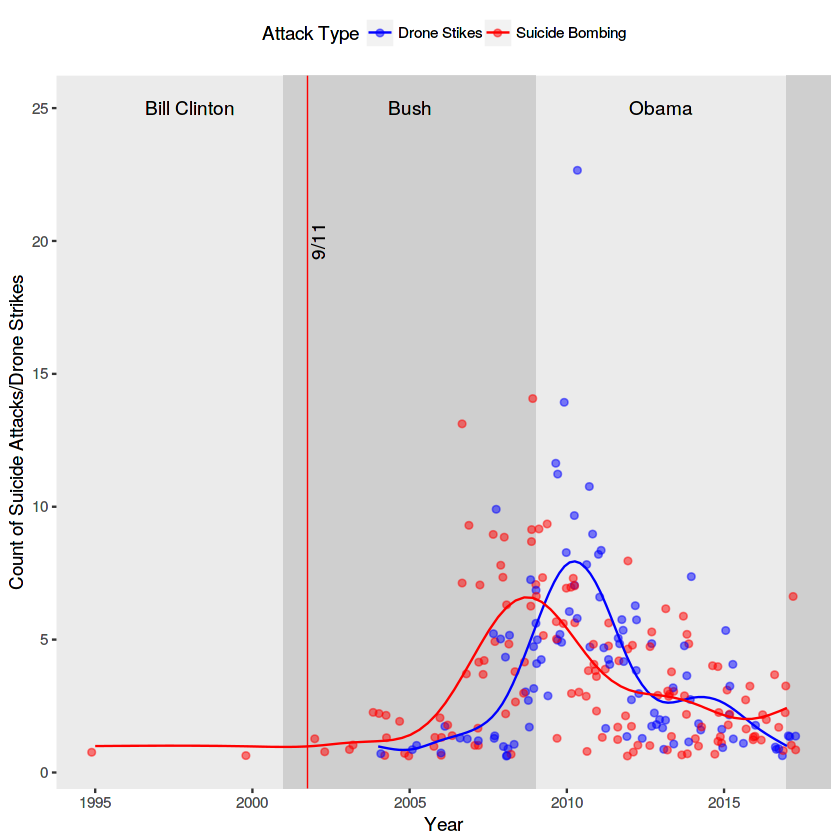

In [134]:
df %>% select(gr_year, gr_month, sa_Killed.Max, da_Total.Died.Max) %>% gather('type', 'val', -gr_year, -gr_month) %>% 
group_by(gr_year,gr_month, type) %>% summarise(cnt=sum(!is.na(val)), dead=sum(val, na.rm=TRUE)) %>% filter(cnt!=0) %>%
    ggplot() + 
    scale_color_manual(values=c('blue', 'red')) +
    geom_rect(fill='gray85', xmin=2001, xmax=2009, ymin=-Inf, ymax=Inf, alpha=0.03) +
    geom_rect(fill='gray85', xmin=2017, xmax=Inf, ymin=-Inf, ymax=Inf, alpha=0.03) +
    geom_vline(xintercept=2001.75, color='red', size=0.3) + 
    annotate(geom = "text", x = 1998, y = 25, label = "Bill Clinton") +
    annotate(geom = "text", x = 2005, y = 25, label = "Bush") +
    annotate(geom = "text", x = 2013, y = 25, label = "Obama") +
    annotate(geom = 'text', x = 2002.1, y=20, label= '9/11', angle=90) +
    geom_point(aes(x=gr_year, y=cnt, color=type), position='jitter', alpha=0.5) + 
    geom_smooth(aes(x=gr_year, y=cnt, color=type),method='gam', formula=y~s(x), se=FALSE, size=0.5) +
    labs(x='Year', y='Count of Suicide Attacks/Drone Strikes') + 
    scale_color_manual(name='Attack Type', labels=c('Drone Stikes', 'Suicide Bombing'), values=c('blue', 'red')) + 
    theme(legend.position='top',panel.grid.major = element_blank(), panel.grid.minor = element_blank())

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


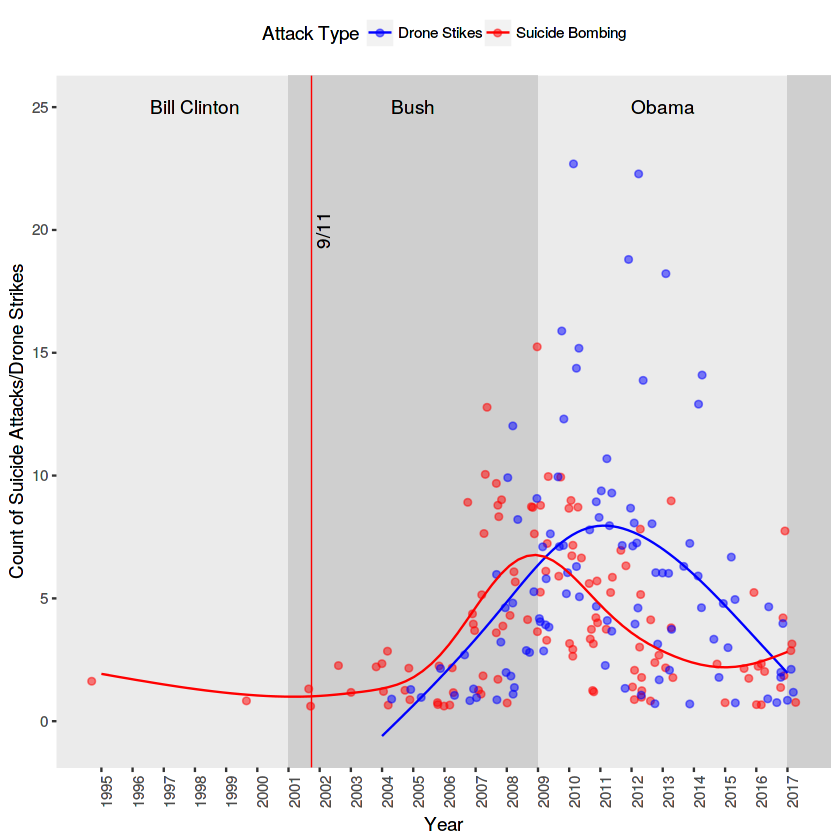

In [138]:
df %>% group_by(gr_year, gr_month) %>% summarise(sval=sum(sa_No..of.Suicide.Blasts, na.rm=TRUE), dval=sum(da_No.of.Strike, na.rm=TRUE)) %>% 
gather('type', 'val', -gr_year, -gr_month) %>% filter(val!=0) %>%
ggplot() + 
scale_color_manual(values=c('blue', 'red')) +
    geom_rect(fill='gray85', xmin=2001, xmax=2009, ymin=-Inf, ymax=Inf, alpha=0.03) +
    geom_rect(fill='gray85', xmin=2017, xmax=Inf, ymin=-Inf, ymax=Inf, alpha=0.03) +
    geom_vline(xintercept=2001.75, color='red', size=0.3) + 
    annotate(geom = "text", x = 1998, y = 25, label = "Bill Clinton") +
    annotate(geom = "text", x = 2005, y = 25, label = "Bush") +
    annotate(geom = "text", x = 2013, y = 25, label = "Obama") +
    annotate(geom = 'text', x = 2002.1, y=20, label= '9/11', angle=90) +
    geom_point(aes(x=gr_year, y=val, color=type), position='jitter', alpha=0.5) + 
    geom_smooth(aes(x=gr_year, y=val, color=type),method='gam', formula=y~s(x), se=FALSE, size=0.5) +
    labs(x='Year', y='Count of Suicide Attacks/Drone Strikes') + 
    scale_color_manual(name='Attack Type', labels=c('Drone Stikes', 'Suicide Bombing'), values=c('blue', 'red')) + 
    theme(legend.position='top',panel.grid.major = element_blank(), panel.grid.minor = element_blank(),axis.text.x = element_text(angle=90)) +
    scale_x_continuous(breaks=seq(1995,2017,1))

### Time lapse gregorian 

In [9]:
df %>% group_by(sa) %>% summarise(n())

sa n()
1  1 503
2 NA 344

`geom_smooth()` using method = 'loess'


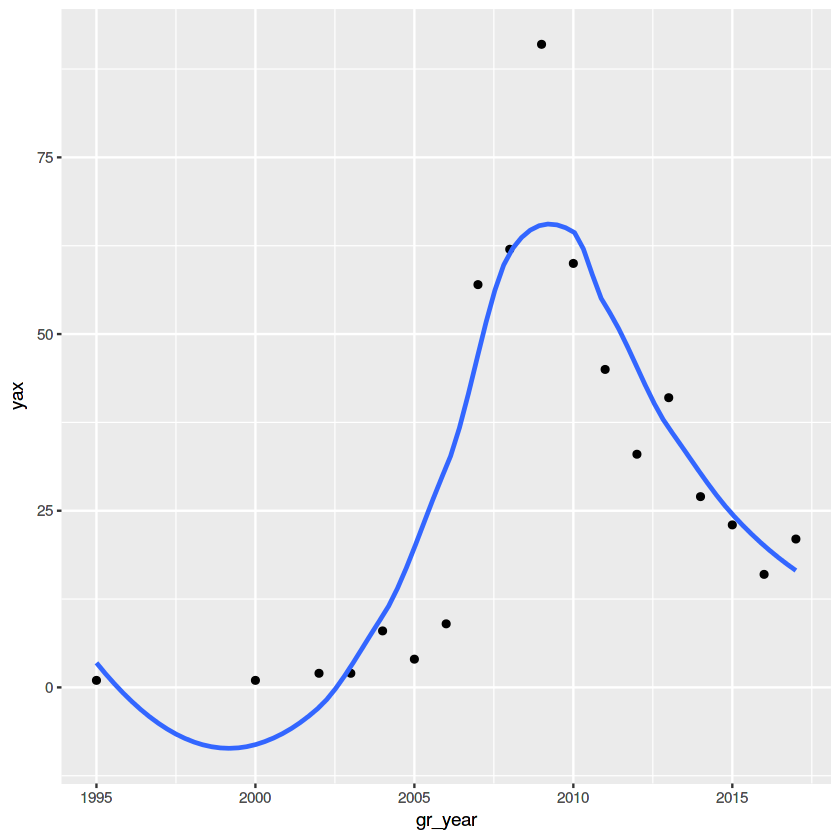

In [10]:
pdf <- df %>% filter(sa==1) %>% group_by(gr_year) %>% summarise('yax'=n())
ggplot(pdf) + geom_point(aes(x=gr_year, y=yax)) + geom_smooth(aes(x=gr_year, y=yax), se=FALSE)

`geom_smooth()` using method = 'loess'


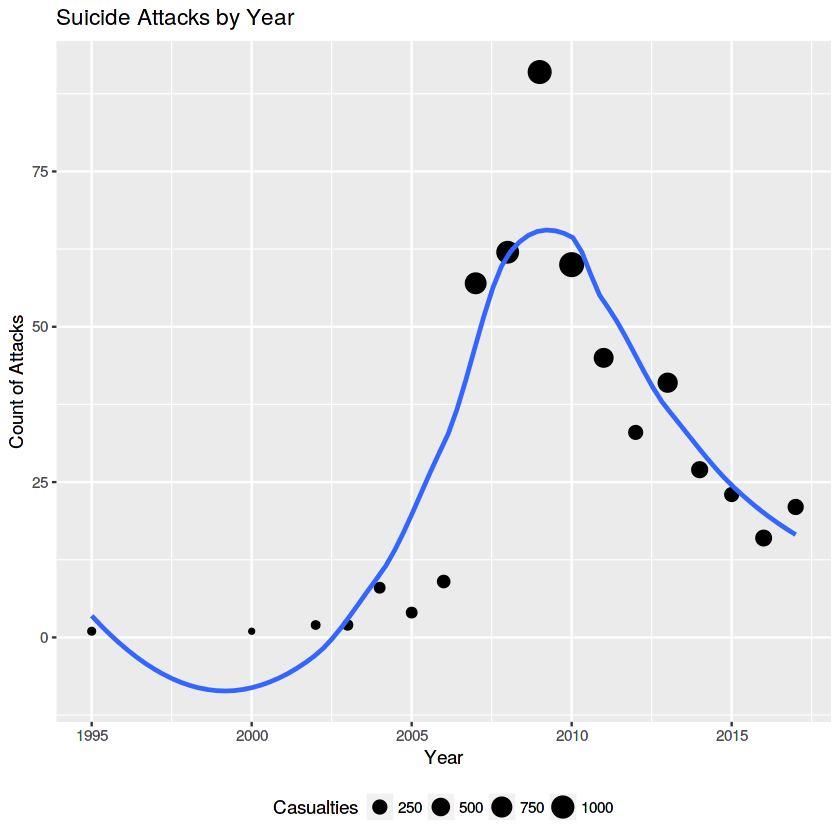

In [11]:
df %>% filter(sa==1) %>% group_by(gr_year) %>% summarise('yax'=n(), dead=sum(sa_Killed.Max, na.rm=TRUE)) %>% 
ggplot() + 
labs(aes(x='Year', y='Count of Attacks', size='Casualties', title='Suicide Attacks by Year')) +
geom_point(aes(x=gr_year, y=yax, size=dead)) + 
geom_smooth(aes(x=gr_year, y=yax), se=FALSE) + 
theme(legend.position='bottom')

`geom_smooth()` using method = 'loess'
Warning message:
In simpleLoess(y, x, w, span, degree = degree, parametric = parametric, : Chernobyl! trL>n 6Warning message:
In simpleLoess(y, x, w, span, degree = degree, parametric = parametric, : Chernobyl! trL>n 6Warning message:
In sqrt(sum.squares/one.delta): NaNs producedWarning message:
In simpleLoess(y, x, w, span, degree = degree, parametric = parametric, : span too small.   fewer data values than degrees of freedom.Warning message:
In simpleLoess(y, x, w, span, degree = degree, parametric = parametric, : at  2016Warning message:
In simpleLoess(y, x, w, span, degree = degree, parametric = parametric, : radius  2.5e-05Warning message:
In simpleLoess(y, x, w, span, degree = degree, parametric = parametric, : all data on boundary of neighborhood. make span biggerWarning message:
In simpleLoess(y, x, w, span, degree = degree, parametric = parametric, : pseudoinverse used at 2016Warning message:
In simpleLoess(y, x, w, span, degree = degree,

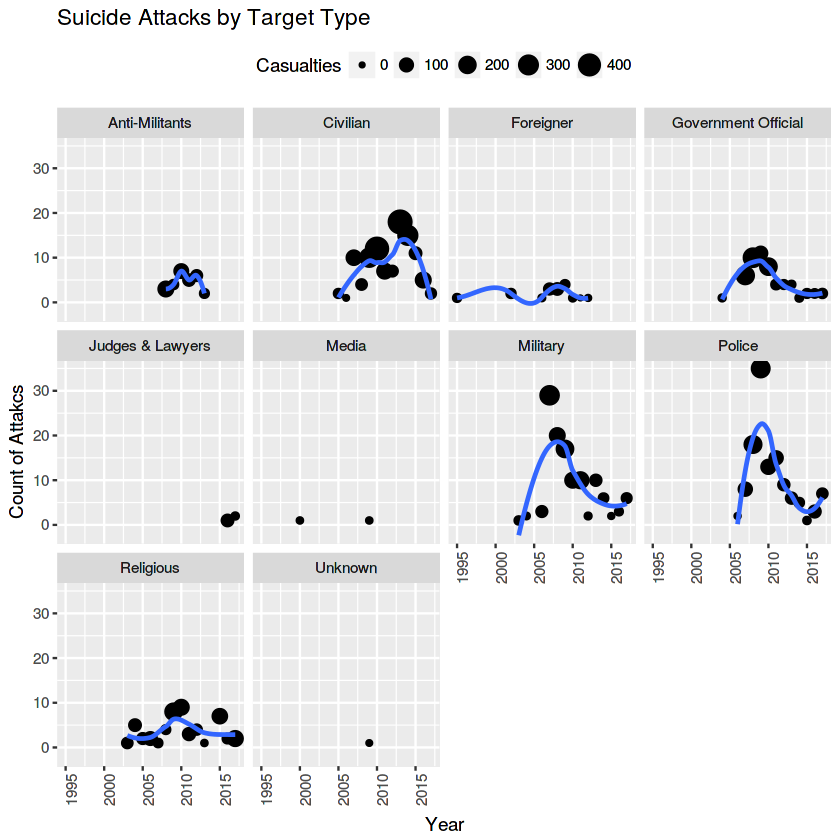

In [68]:
df %>% filter(sa==1) %>% group_by(gr_year, sa_Target.Type) %>% summarise('yax'=n(), dead=sum(sa_Killed.Max, na.rm=TRUE)) %>%
ggplot() + 
labs(x='Year', y='Count of Attakcs', size='Casualties', title='Suicide Attacks by Target Type') +
geom_point(aes(x=gr_year, y=yax, size=dead)) + 
geom_smooth(aes(x=gr_year, y=yax), se=FALSE, na.rm=TRUE) + 
facet_wrap(~sa_Target.Type) +
theme(axis.text.x=element_text(angle=90,hjust=1), legend.position='top')

`geom_smooth()` using method = 'loess'


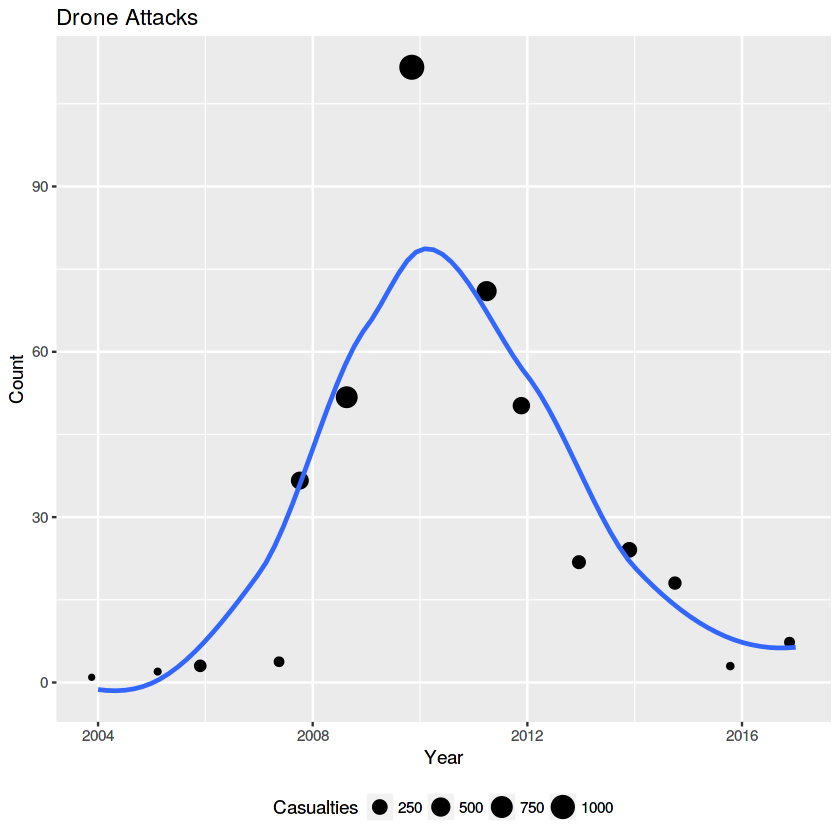

In [13]:
pdf <- df %>% filter(da==1) %>% group_by(gr_year) %>% summarise('yax'=n(), dead=sum(da_Total.Died.Max, na.rm=TRUE))
ggplot(pdf) + 
labs(x='Year', y='Count', title='Drone Attacks', size='Casualties') +
geom_point(aes(x=gr_year, y=yax, size=dead), position='jitter') + 
geom_smooth(aes(x=gr_year, y=yax), se=FALSE) + 
theme(legend.position = 'bottom')

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


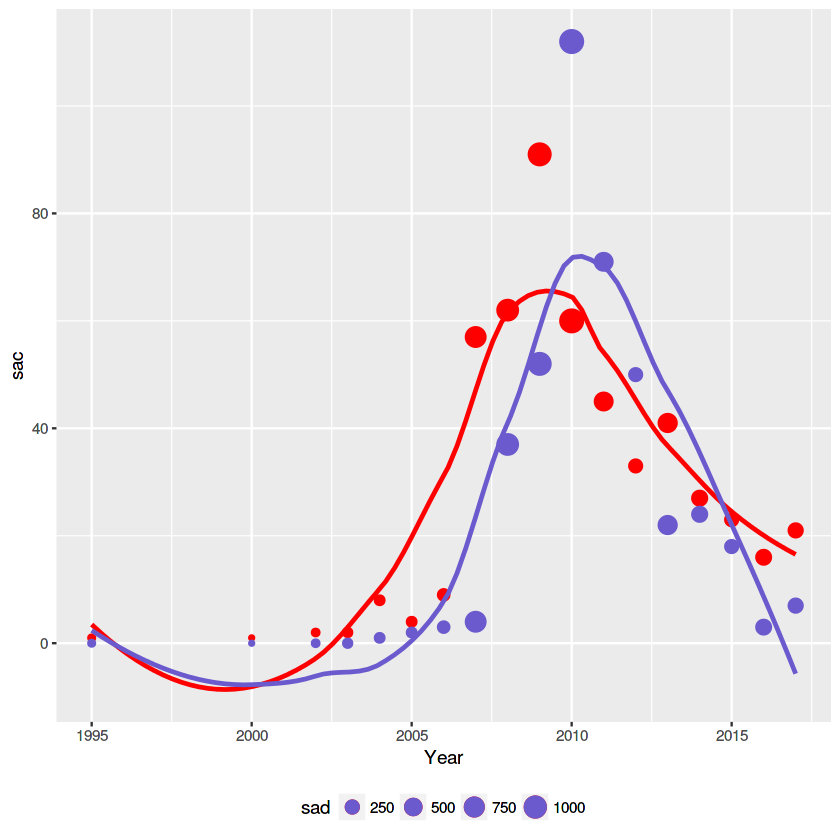

In [65]:
pdf <- df %>% filter(sa==1 | da==1) %>% group_by(gr_year) %>% summarise(sac=sum(sa, na.rm=TRUE), dac=sum(da, na.rm=TRUE), sad=sum(sa_Killed.Max, na.rm=TRUE),dad=sum(sa_Killed.Max, na.rm=TRUE))

ggplot(pdf) + 
    geom_point(aes(x=gr_year, y=sac, size=sad), color='red') + 
    geom_smooth(aes(x=gr_year, y=sac), color='red', se=FALSE, na.rm=TRUE) +
    geom_point(aes(x=gr_year, y=dac, size=dad), color='slateblue') + 
    geom_smooth(aes(x=gr_year, y=dac), color='slateblue', se=FALSE, na.rm=TRUE) +
    labs(x='Year', 'Count of Attacks') +
    theme(legend.position='bottom') + 
    #scale_color_discrete(name = "Y series", labels = c("Y2", "Y1")) +
    scale_color_manual(name='the color', values=c('red'='red', 'gray3'='gray3'), labels=c('c1','c2'))

In [132]:
df %>% select(gr_year, gr_month, sa_Killed.Max, da_Total.Died.Max) %>% gather('sada', 'val', -gr_year, -gr_month) %>% 
group_by(gr_year,gr_month, sada) %>% summarise(cnt=sum(!is.na(val)), dead=sum(val, na.rm=TRUE)) %>% filter(cnt!=0)

gr_year gr_month sada              cnt dead
1   1995    11       sa_Killed.Max     1   15  
2   2000    11       sa_Killed.Max     1    3  
3   2002     5       sa_Killed.Max     1   15  
4   2002     6       sa_Killed.Max     1   12  
5   2003     7       sa_Killed.Max     1   47  
6   2003    12       sa_Killed.Max     1   18  
7   2004     2       sa_Killed.Max     1    1  
8   2004     5       sa_Killed.Max     2   33  
9   2004     6       da_Total.Died.Max 1    5  
10  2004     6       sa_Killed.Max     1    2  
11  2004     7       sa_Killed.Max     2   10  
12  2004    10       sa_Killed.Max     2   36  
13  2005     3       sa_Killed.Max     1   50  
14  2005     4       sa_Killed.Max     1    2  
15  2005     5       da_Total.Died.Max 1    2  
16  2005     5       sa_Killed.Max     2   31  
17  2005    12       da_Total.Died.Max 1    5  
18  2006     1       da_Total.Died.Max 2   21  
19  2006     2       sa_Killed.Max     1   40  
20  2006     3       sa_Killed.Max     1    5  
21  2006     4       sa_Killed.Max     1   57  
22  2006     6       sa_Killed.Max     2   14  
23  2006     8       sa_Killed.Max     1    1  
24  2006    10       da_Total.Died.Max 1   82  
25  2006    11       sa_Killed.Max     2   43  
26  2006    12       sa_Killed.Max     1    1  
27  2007     1       sa_Killed.Max     4   25  
28  2007     2       sa_Killed.Max     4   21  
29  2007     3       sa_Killed.Max     1    2  
30  2007     4       da_Total.Died.Max 1    4  
⋮   ⋮       ⋮        ⋮                 ⋮   ⋮   
209 2015     9       da_Total.Died.Max 4    34 
210 2015     9       sa_Killed.Max     1     6 
211 2015    10       sa_Killed.Max     2    34 
212 2015    12       sa_Killed.Max     1    26 
213 2016     1       da_Total.Died.Max 2     8 
214 2016     1       sa_Killed.Max     3    27 
215 2016     2       sa_Killed.Max     1    11 
216 2016     3       sa_Killed.Max     2    92 
217 2016     4       sa_Killed.Max     2     3 
218 2016     5       da_Total.Died.Max 1     2 
219 2016     5       sa_Killed.Max     1     1 
220 2016     8       sa_Killed.Max     1    70 
221 2016     9       sa_Killed.Max     3    50 
222 2016    10       sa_Killed.Max     1    61 
223 2016    11       sa_Killed.Max     2    54 
224 2017     2       sa_Killed.Max     7   107 
225 2017     3       da_Total.Died.Max 1     2 
226 2017     4       da_Total.Died.Max 1    10 
227 2017     4       sa_Killed.Max     1     7 
228 2017     5       da_Total.Died.Max 1     3 
229 2017     5       sa_Killed.Max     2    32 
230 2017     6       da_Total.Died.Max 1     2 
231 2017     6       sa_Killed.Max     1    85 
232 2017     7       da_Total.Died.Max 1     4 
233 2017     7       sa_Killed.Max     4    33 
234 2017     8       sa_Killed.Max     1    15 
235 2017     9       da_Total.Died.Max 1     3 
236 2017    10       da_Total.Died.Max 1    26 
237 2017    10       sa_Killed.Max     2    29 
238 2017    11       sa_Killed.Max     3     9

`geom_smooth()` using method = 'loess'


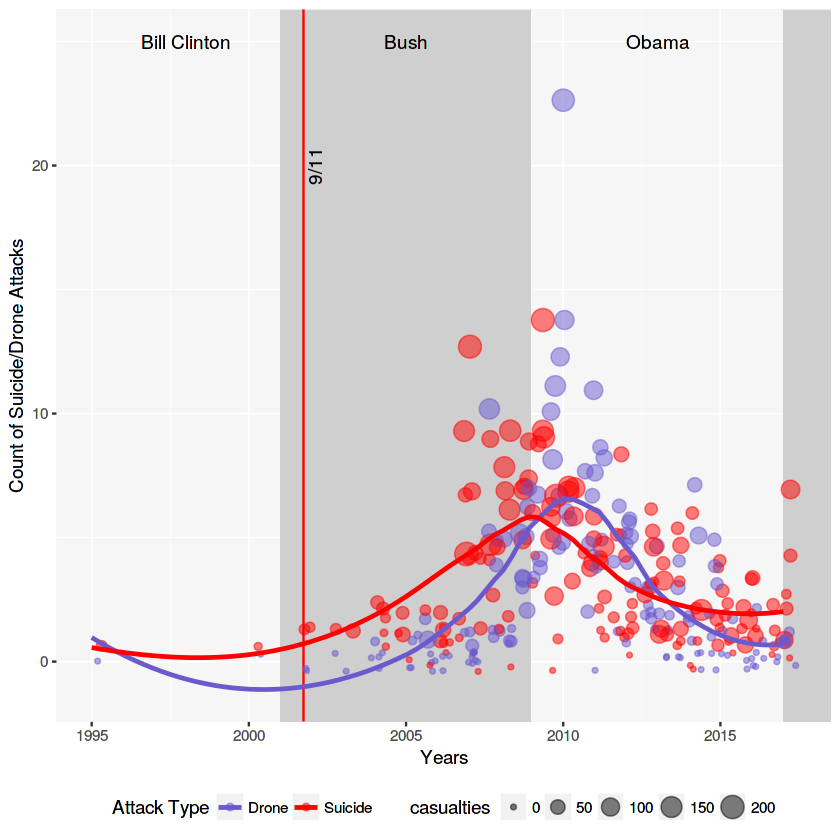

In [66]:
df %>% select(gr_year, gr_month, sa_Killed.Max, da_Total.Died.Max) %>% gather('sada', 'val', -gr_year, -gr_month) %>% 
group_by(gr_year,gr_month, sada) %>% summarise(count=sum(!is.na(val)), casualties=sum(val, na.rm=TRUE)) %>% 
    ggplot(aes(x=gr_year, y=count)) +
    geom_rect(fill='gray100', xmin=1993, xmax=2001, ymin=-Inf, ymax=Inf, alpha=0.05) +
    geom_rect(fill='gray85', xmin=2001, xmax=2009, ymin=-Inf, ymax=Inf, alpha=0.03) +
    geom_rect(fill='gray100', xmin=2009, xmax=2017, ymin=-Inf, ymax=Inf, alpha=0.05) +
    geom_rect(fill='gray85', xmin=2017, xmax=Inf, ymin=-Inf, ymax=Inf, alpha=0.03) +
    geom_vline(xintercept=2001.75, color='red') + 
    annotate(geom = "text", x = 1998, y = 25, label = "Bill Clinton") +
    annotate(geom = "text", x = 2005, y = 25, label = "Bush") +
    annotate(geom = "text", x = 2013, y = 25, label = "Obama") +
    annotate(geom = 'text', x = 2002.1, y=20, label= '9/11', angle=90) +
    geom_point(aes(size=casualties, color=sada), position='jitter', alpha=0.5) + 
    geom_smooth(aes(color=sada),se=FALSE) +
    labs(x='Years', y='Count of Suicide/Drone Attacks', color='Attack Type') +
    scale_color_manual(labels = c("Drone", "Suicide"), values = c("slateblue", "red")) + 
    theme(legend.position='bottom')

`geom_smooth()` using method = 'loess'


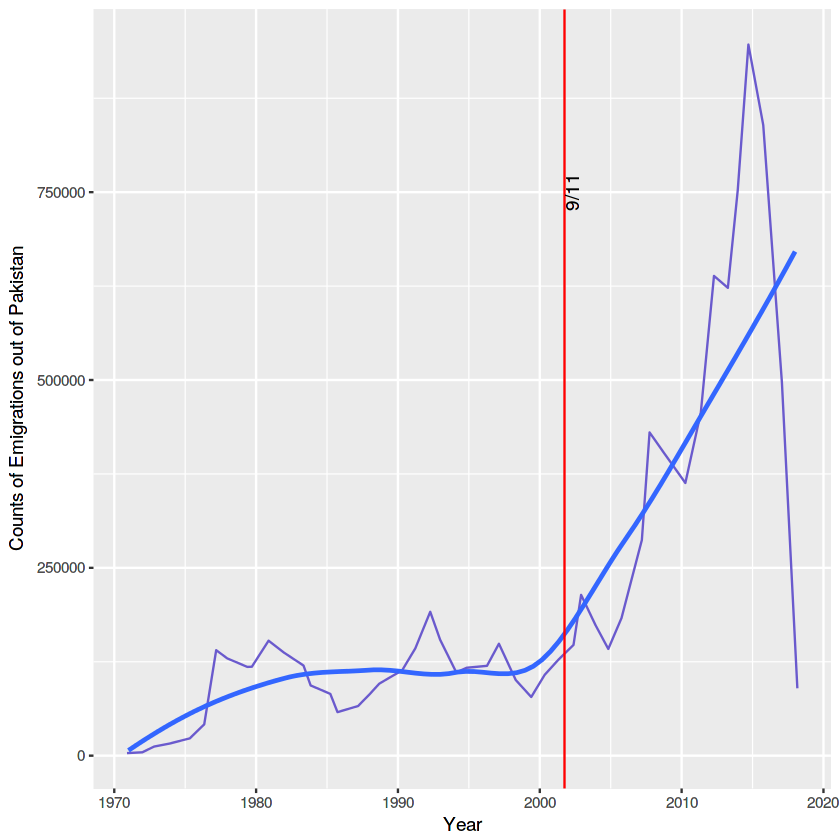

In [169]:
em_oc %>% 
    ggplot() + 
    labs(x='Year', y='Counts of Emigrations out of Pakistan') +
    geom_line(aes(x=Year, y=Total),color='slateblue', position='jitter') + 
    geom_smooth(aes(x=Year, y=Total), se=FALSE) + 
    geom_vline(xintercept=2001.75, color='red') + 
    annotate(geom = 'text', x = 2002.3, y=750000, label= '9/11', angle=90)

## Impact of terrorism on Emigration

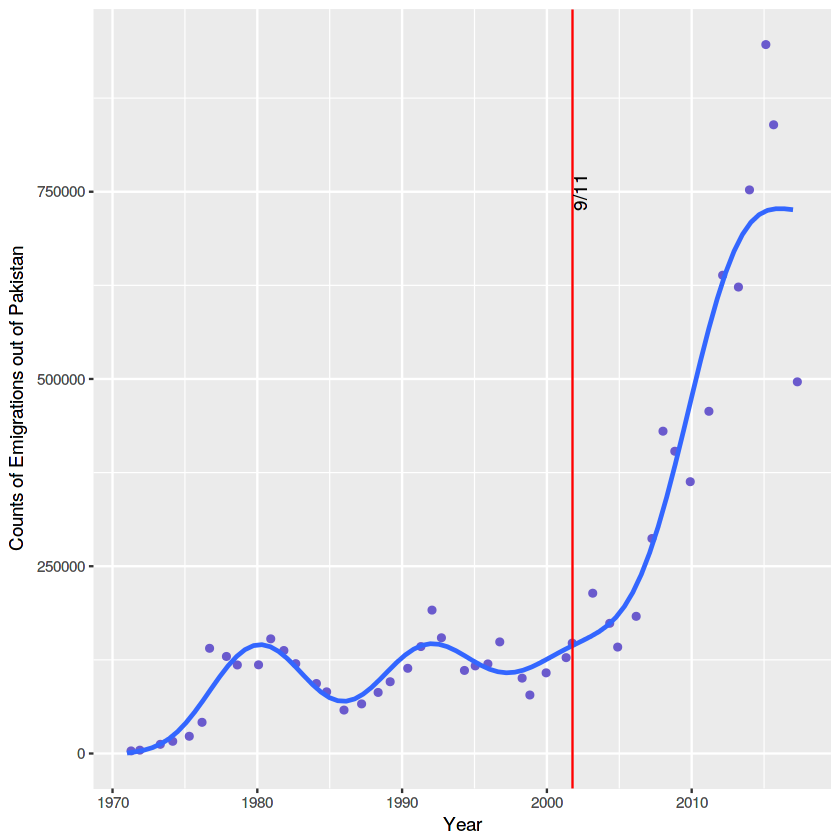

In [74]:
# The palette with black:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

em_oc %>% filter(Year!=2018) %>%
    ggplot() + 
    labs(x='Year', y='Counts of Emigrations out of Pakistan') +
    geom_point(aes(x=Year, y=Total),color='slateblue', position='jitter') + 
    geom_smooth(aes(x=Year, y=Total),method='gam', formula=y~s(x), se=FALSE) + 
    geom_vline(xintercept=2001.75, color='red') + 
    annotate(geom = 'text', x = 2002.3, y=750000, label= '9/11', angle=90)

`geom_smooth()` using method = 'loess'


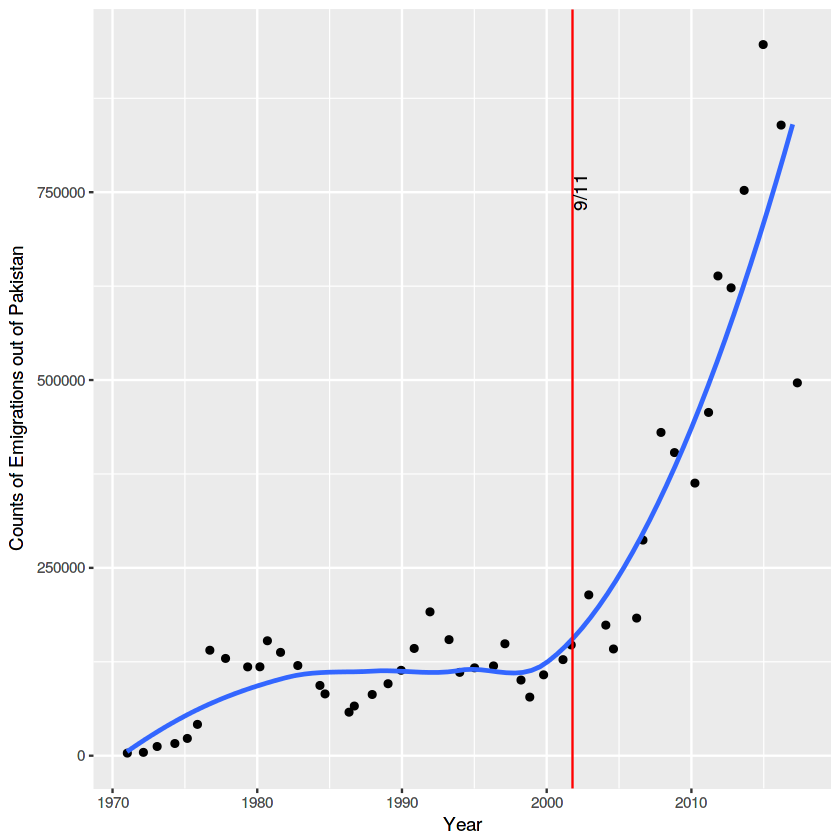

In [84]:
em_oc %>% filter(Year!=2018) %>%
    ggplot() + 
    labs(x='Year', y='Counts of Emigrations out of Pakistan') +
    geom_point(aes(x=Year, y=Total), position='jitter') + 
    geom_smooth(aes(x=Year, y=Total), se=FALSE) + 
    geom_vline(xintercept=2001.75, color='red') + 
    annotate(geom = 'text', x = 2002.3, y=750000, label= '9/11', angle=90)

## Which Occupation Types are spiking up the Emigration

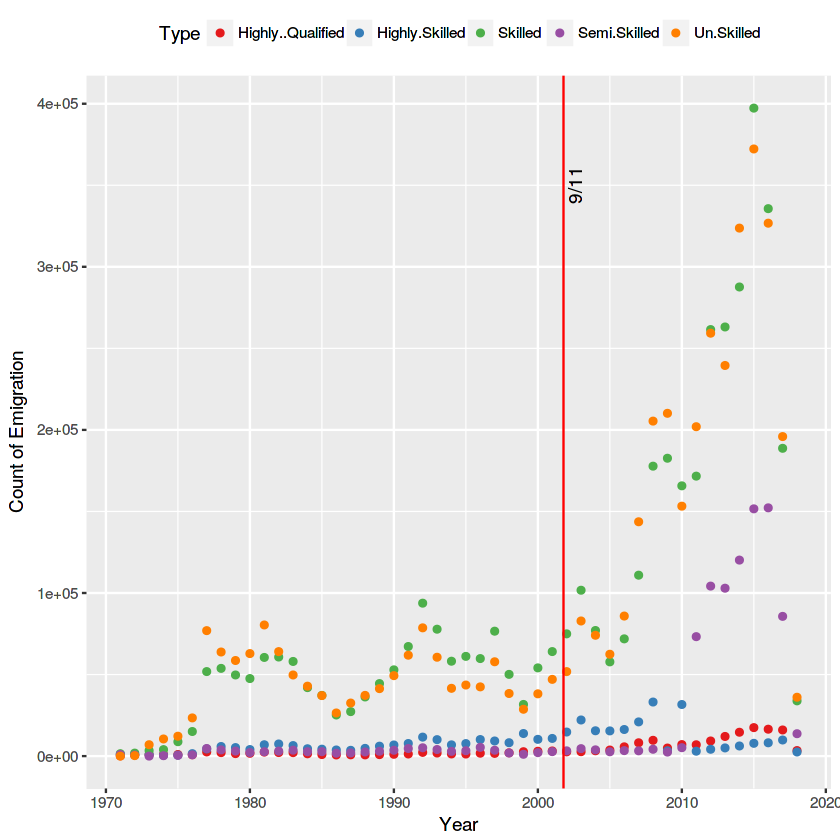

In [83]:

em_oc_l <- em_oc[-7]
em_oc_l <- em_oc_l %>% gather('Type', 'Count', -Year)
em_oc_l$Type <- factor(em_oc_l$Type, levels=c('Highly..Qualified', 'Highly.Skilled', 'Skilled', 'Semi.Skilled', 'Un.Skilled'))
em_oc_l %>% 
ggplot() + 
labs(x='Year', y='Count of Emigration') +
geom_point(aes(x=Year, y=Count, color=Type)) + 
geom_vline(xintercept=2001.75, color='red') + 
annotate(geom = 'text', x = 2002.6, y=350000, label= '9/11', angle=90) + theme(legend.position = 'top') + 
scale_color_brewer(palette="Set1")
#scale_color_manual(name='c', values=c('red', 'blue', 'gold', 'pink', 'brown'), labels=c('Highly Qualified', 'Highly Skilled', 'Semi Skilled', 'Skilled', 'Unskilled'))

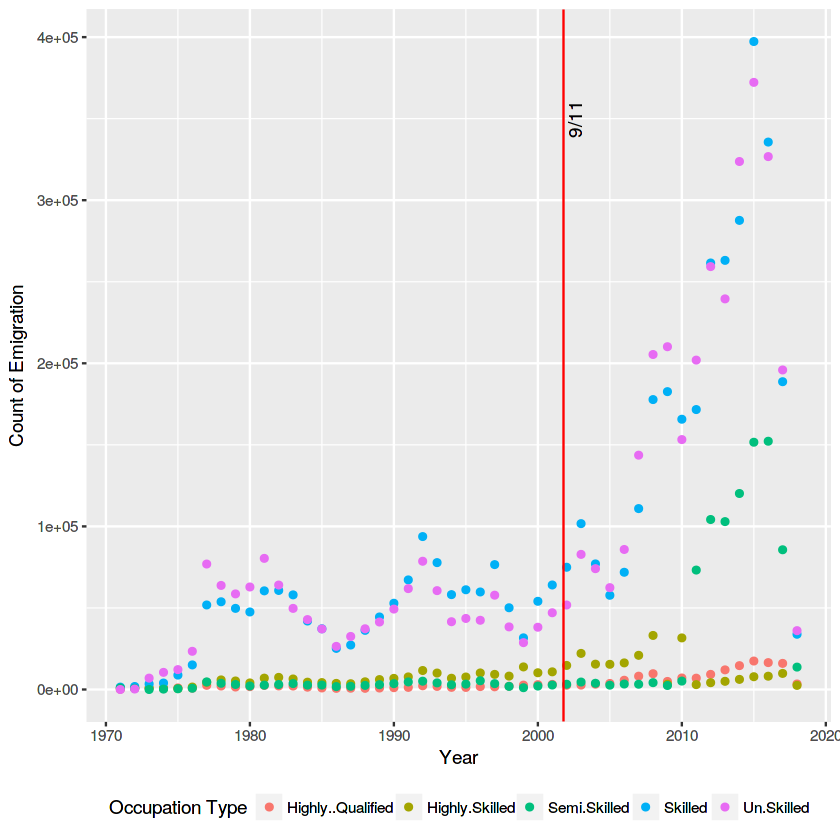

In [17]:
em_oc_l <- em_oc[-7]
em_oc_l <- em_oc_l %>% gather('Type', 'Count', -Year)
em_oc_l %>% 
ggplot() + 
labs(x='Year', y='Count of Emigration', color='Occupation Type') +
geom_point(aes(x=Year, y=Count, color=Type)) + 
geom_vline(xintercept=2001.75, color='red') + 
annotate(geom = 'text', x = 2002.6, y=350000, label= '9/11', angle=90) + theme(legend.position = 'bottom')

## View Emigration Province Wise

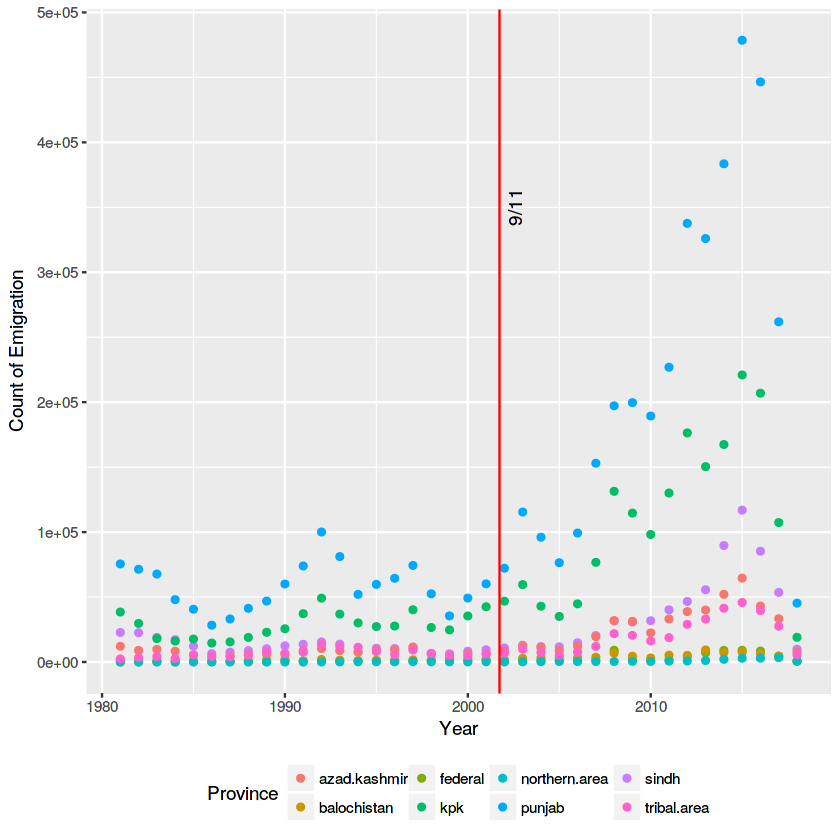

In [18]:
em_pr_l <- em_pr[-10]
em_pr_l <- em_pr_l %>% gather('province', 'count', -year)
em_pr_l %>% 
ggplot() + 
labs(x='Year', y='Count of Emigration', color='Province') +
geom_point(aes(x=year, y=count, color=province)) + 
geom_vline(xintercept=2001.75, color='red') + 
annotate(geom = 'text', x = 2002.6, y=350000, label= '9/11', angle=90) + 
theme(legend.position = 'bottom')

## Where are the people emigrating to

Warning message:
In plot.xy(xy.coords(x, y), type = type, ...): "alpha" is not a graphical parameterWarning message:
In plot.xy(xy.coords(x, y), type = type, ...): "alpha" is not a graphical parameterWarning message:
In plot.xy(xy.coords(x, y), type = type, ...): "alpha" is not a graphical parameterWarning message:
In plot.xy(xy.coords(x, y), type = type, ...): "alpha" is not a graphical parameterWarning message:
In plot.xy(xy.coords(x, y), type = type, ...): "alpha" is not a graphical parameterWarning message:
In plot.xy(xy.coords(x, y), type = type, ...): "alpha" is not a graphical parameterWarning message:
In plot.xy(xy.coords(x, y), type = type, ...): "alpha" is not a graphical parameterWarning message:
In plot.xy(xy.coords(x, y), type = type, ...): "alpha" is not a graphical parameterWarning message:
In plot.xy(xy.coords(x, y), type = type, ...): "alpha" is not a graphical parameterWarning message:
In plot.xy(xy.coords(x, y), type = type, ...): "alpha" is not a graphical parameter

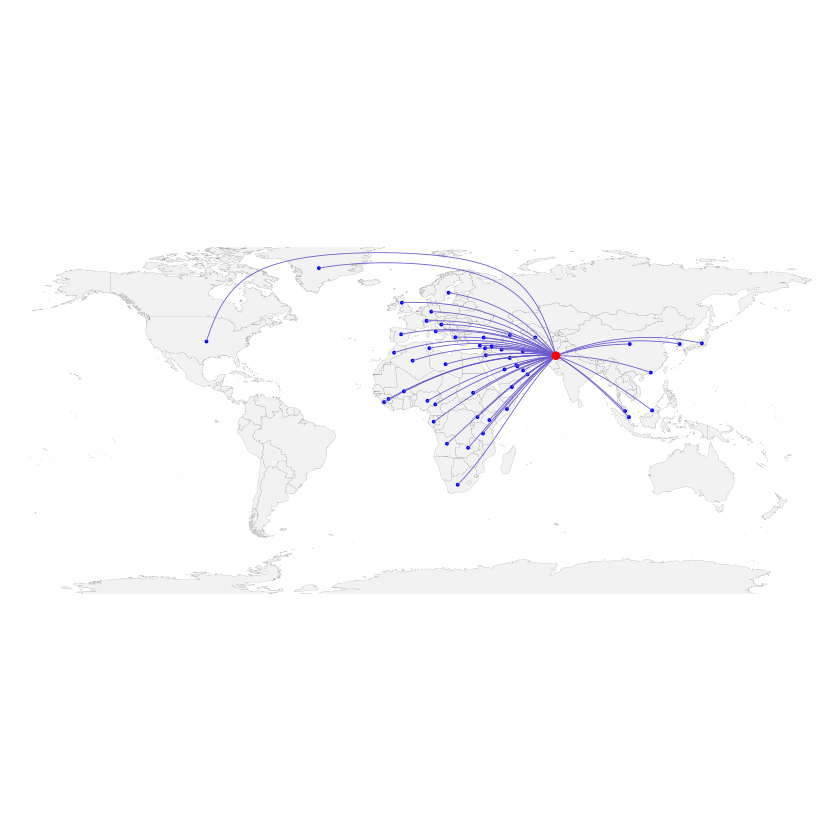

In [19]:
#filtering datafraem
flow_df <- em_co_lat_long %>% filter(!is.na(em_co_lat_long$latitude))

#creating map
par(mar=c(0,0,0,0))
map('world',col="#f2f2f2", fill=TRUE, bg="white", lwd=0.05,mar=rep(0,4),border=1, ylim=c(-80,80) )

#adding flow lines
for (i in 1: nrow(flow_df)) {
    inter <- gcIntermediate(
    #pakistan
      c(69.34511599999996,30.375321),
      c(flow_df[i,]$longitude, flow_df[i,]$latitude),
      n = 100,
      addStartEnd=TRUE
    )
    points(x=flow_df[i,]$longitude, y=flow_df[i,]$latitude, col="blue", cex=0.2, pch=20)
    lines(inter, col='slateblue', lwd=0.5, alpha=0.5)
}

#adding pakistan
points(x=69.34511599999996, y=30.375321, col="red", cex=1, pch=20)

## Attacks in relation to date and time

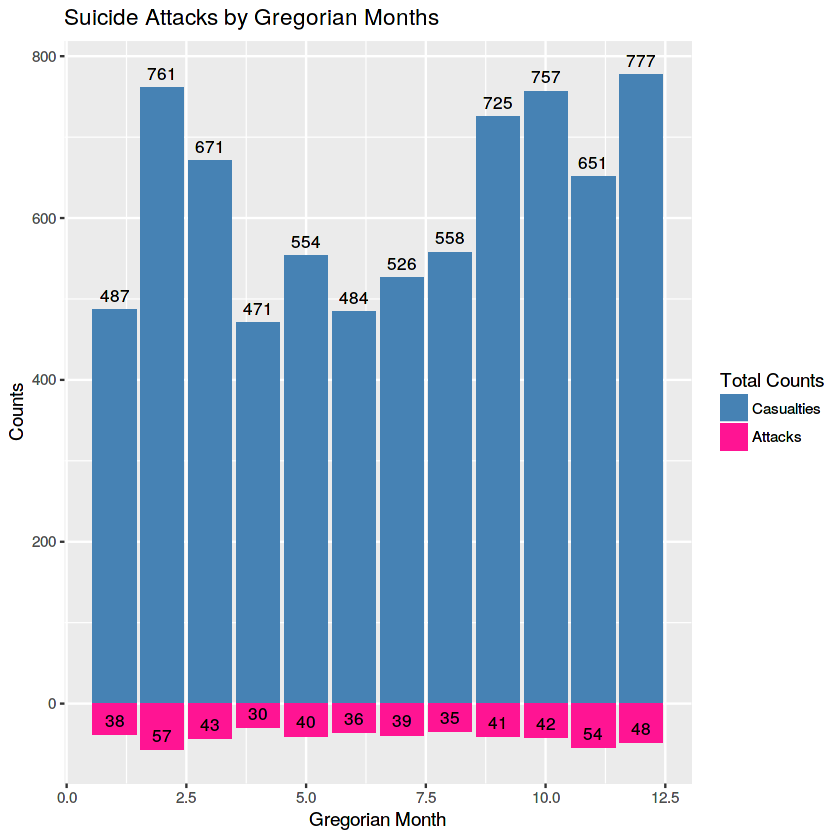

In [20]:
pdf <- df %>% filter(sa==1) %>% group_by(gr_month) %>% summarise(nbr=n(), dead=sum(sa_Killed.Max, na.rm=TRUE)) %>% gather('type', 'val', -gr_month)
ggplot(pdf, aes(fill=type)) + 
geom_bar(data=subset(pdf, type=='dead'),aes(x=gr_month, y=val), stat='identity') +
geom_bar(data=subset(pdf, type=='nbr'),aes(x=gr_month, y=-val), stat='identity') +
geom_text(data=subset(pdf, type=='nbr'), aes(gr_month, -val, label=val), vjust=-0.6, size=3.5) + 
geom_text(data=subset(pdf, type=='dead'), aes(gr_month, val, label=val), vjust=-0.6, size=3.5) +
scale_fill_manual(name='Total Counts',labels = c("Casualties", "Attacks"), values = c("steelblue", "deeppink")) +
labs(x='Gregorian Month', y='Counts', title='Suicide Attacks by Gregorian Months', legend.position='bottom')

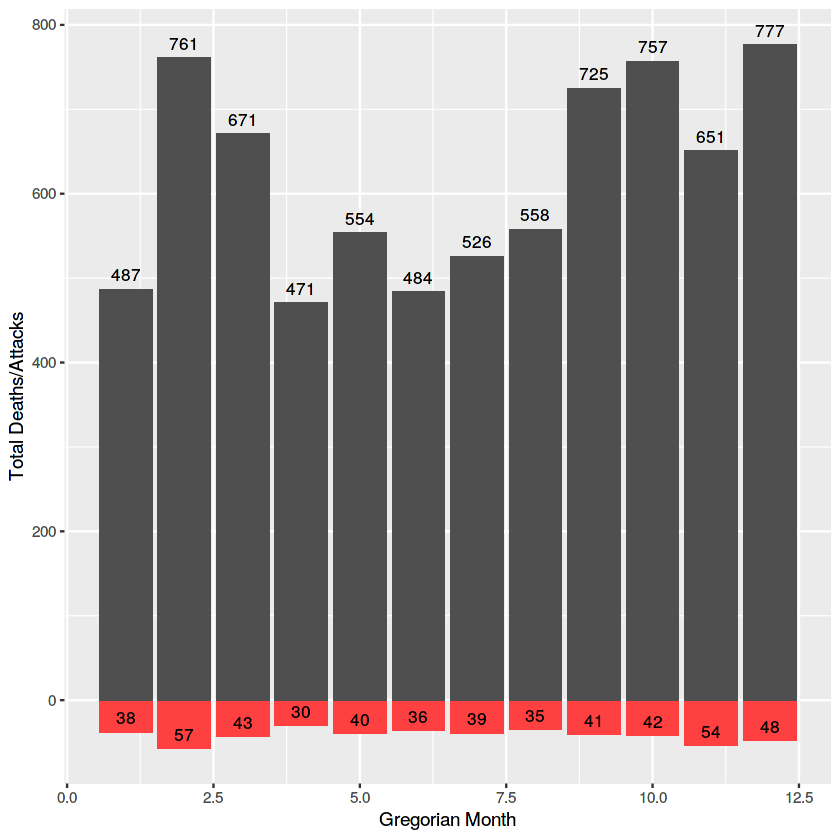

In [21]:
pdf <- df %>% filter(sa==1) %>% group_by(gr_month) %>% summarise(nbr=n(), dead=sum(sa_Killed.Max, na.rm=TRUE))

ggplot(pdf) + labs(x='Gregorian Month', y='Total Deaths/Attacks', fill='type')+
    geom_bar(aes(gr_month, -nbr, fill='Deaths') , fill='brown1', stat='identity') + 
    geom_bar(aes(gr_month, dead, fill='attacks'), stat='identity', fill='gray31') +
    geom_text(aes(gr_month, -nbr, label=nbr), vjust=-0.6, size=3.5) + 
    geom_text(aes(gr_month, dead, label=dead), vjust=-0.6, size=3.5) 
    

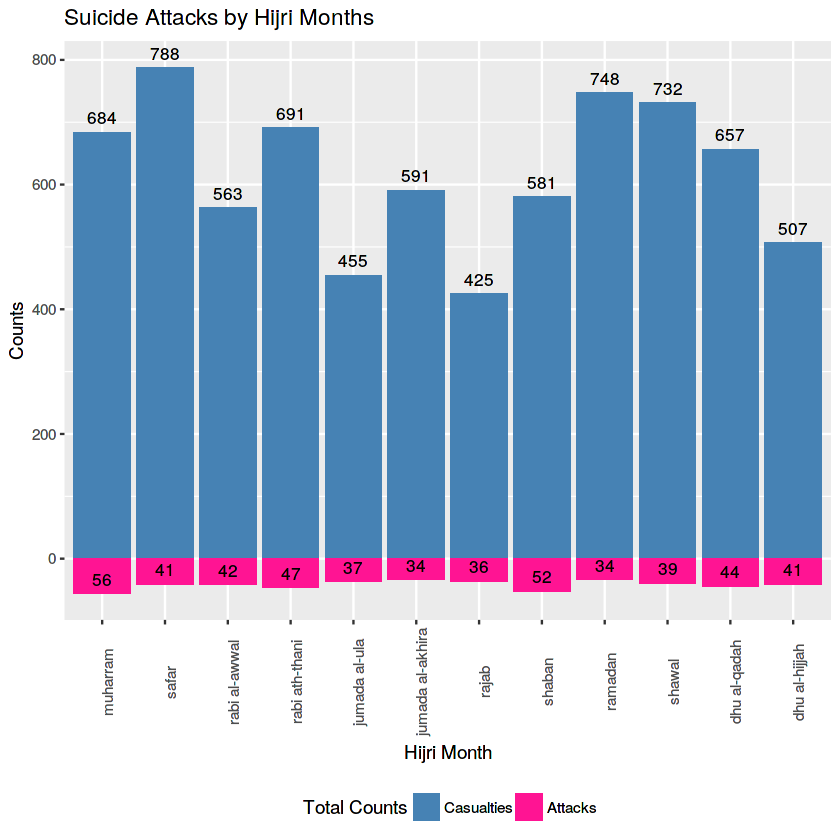

In [22]:
pdf <- df %>% filter(sa==1) %>% group_by(sa_isl_month) %>% summarise(nbr=n(), dead=sum(sa_Killed.Max, na.rm=TRUE)) %>% gather('type', 'val', -sa_isl_month)
ggplot(pdf, aes(fill=type)) + 
geom_bar(data=subset(pdf, type=='dead'),aes(x=sa_isl_month, y=val), stat='identity') +
geom_bar(data=subset(pdf, type=='nbr'),aes(x=sa_isl_month, y=-val), stat='identity') +
geom_text(data=subset(pdf, type=='nbr'), aes(sa_isl_month, -val, label=val), vjust=-0.6, size=3.5) + 
geom_text(data=subset(pdf, type=='dead'), aes(sa_isl_month, val, label=val), vjust=-0.6, size=3.5) +
scale_fill_manual(name='Total Counts',labels = c("Casualties", "Attacks"), values = c("steelblue", "deeppink")) +
labs(x='Hijri Month', y='Counts', title='Suicide Attacks by Hijri Months') +
theme(axis.text.x = element_text(angle = 90, vjust = 1), legend.position='bottom')

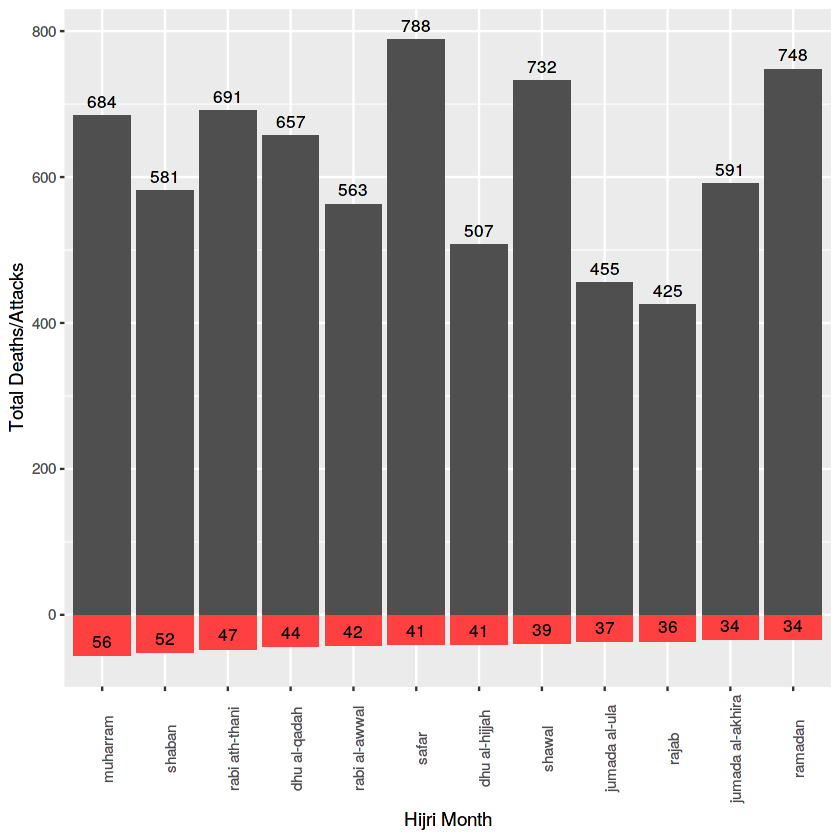

In [23]:
pdf <- df %>% filter(sa==1) %>% group_by(sa_isl_month) %>% summarise(nbr=n(), dead=sum(sa_Killed.Max, na.rm=TRUE))

ggplot(pdf) + labs(x='Hijri Month', y='Total Deaths/Attacks', fill='type')+
    geom_bar(aes(reorder(sa_isl_month, desc(nbr)), -nbr, fill='Deaths') , fill='brown1', stat='identity') + 
    geom_bar(aes(sa_isl_month, dead, fill='attacks'), stat='identity', fill='gray31') +
    geom_text(aes(reorder(sa_isl_month, desc(nbr)), -nbr, label=nbr), vjust=-0.6, size=3.5) + 
    geom_text(aes(sa_isl_month, dead, label=dead), vjust=-0.6, size=3.5) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 1))


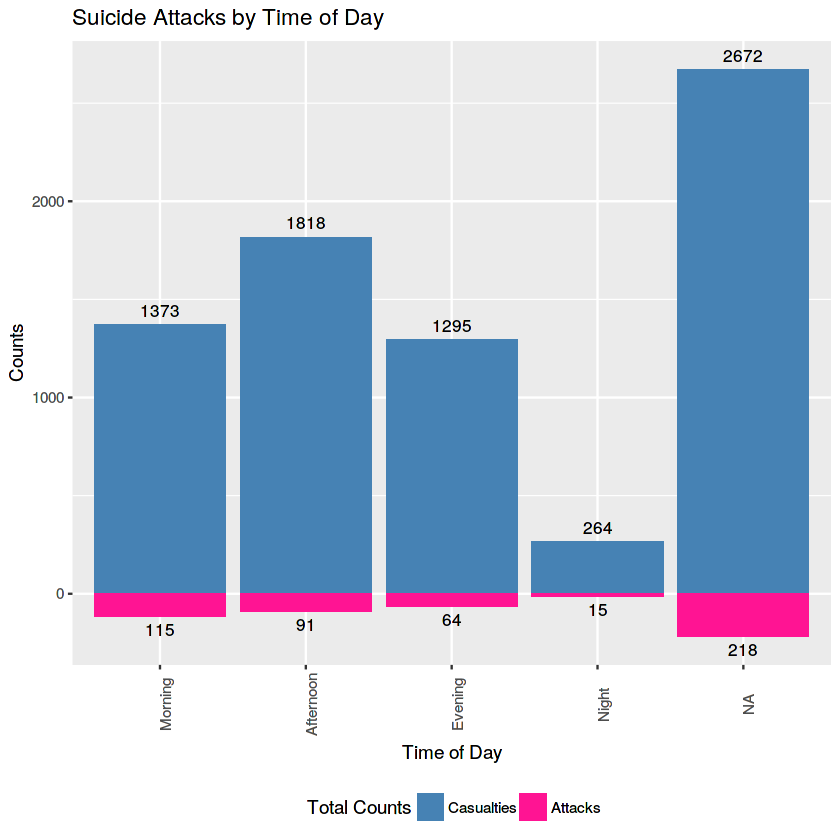

In [24]:
pdf <- df %>% filter(sa==1) %>% group_by(sa_Time) %>% summarise(nbr=n(), dead=sum(sa_Killed.Max, na.rm=TRUE)) %>% gather('type', 'val', -sa_Time)
ggplot(pdf, aes(fill=type)) + 
geom_bar(data=subset(pdf, type=='dead'),aes(x=sa_Time, y=val), stat='identity') +
geom_bar(data=subset(pdf, type=='nbr'),aes(x=sa_Time, y=-val), stat='identity') +
geom_text(data=subset(pdf, type=='nbr'), aes(sa_Time, -val, label=val), vjust=1.5, size=3.5) + 
geom_text(data=subset(pdf, type=='dead'), aes(sa_Time, val, label=val), vjust=-0.6, size=3.5) +
scale_fill_manual(name='Total Counts',labels = c("Casualties", "Attacks"), values = c("steelblue", "deeppink")) +
labs(x='Time of Day', y='Counts', title='Suicide Attacks by Time of Day') +
theme(axis.text.x = element_text(angle = 90, vjust = 1), legend.position='bottom')

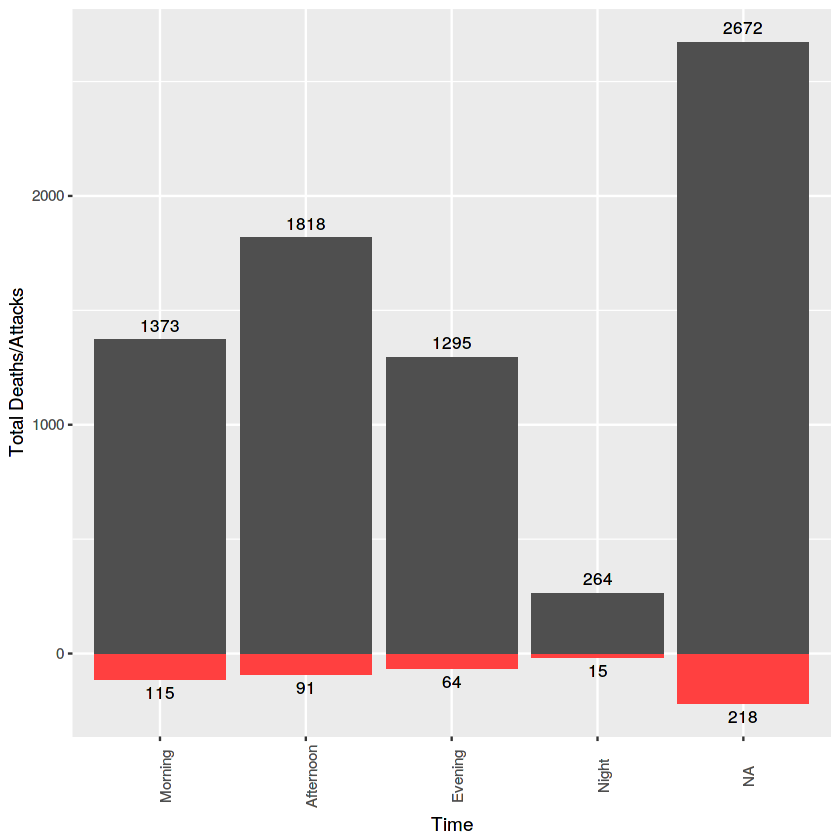

In [25]:
df %>% filter(sa==1) %>% group_by(sa_Time) %>% summarise(nbr=n(), dead=sum(sa_Killed.Max, na.rm=TRUE)) %>%
ggplot() + labs(x='Time', y='Total Deaths/Attacks', fill='type')+
    geom_bar(aes(sa_Time, -nbr, fill='Deaths') , fill='brown1', stat='identity') + 
    geom_bar(aes(sa_Time, dead, fill='attacks'), stat='identity', fill='gray31') +
    geom_text(aes(sa_Time, -nbr, label=nbr), vjust=1.5, size=3.5) + 
    geom_text(aes(sa_Time, dead, label=dead), vjust=-0.6, size=3.5) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 1))
    

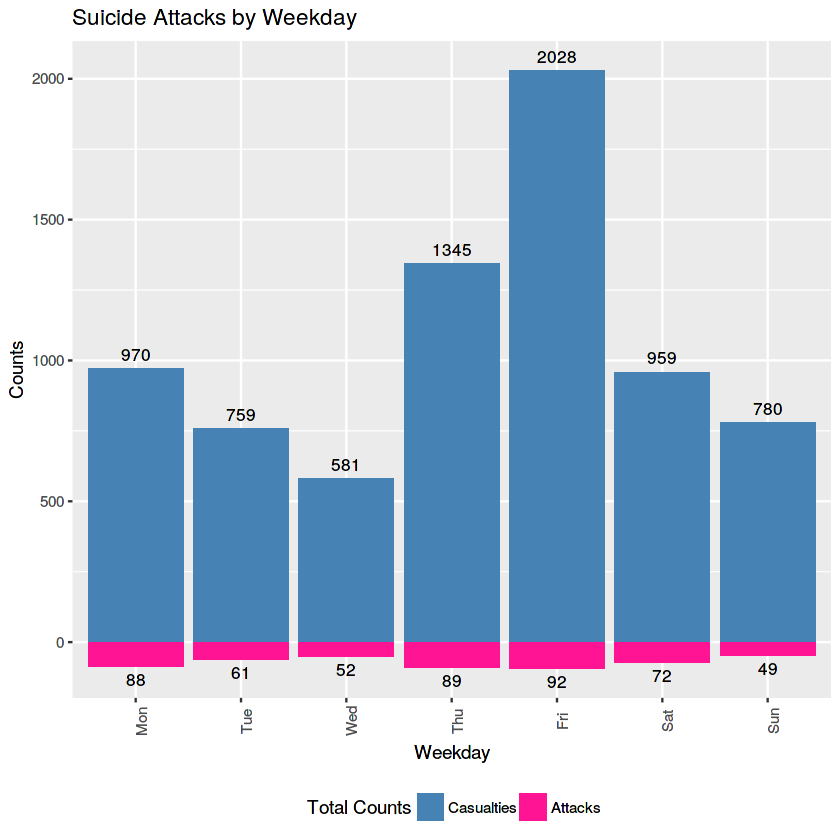

In [26]:
pdf <- df %>% filter(sa==1) %>% group_by(gr_week_day) %>% summarise(nbr=n(), dead=sum(sa_Killed.Max, na.rm=TRUE)) %>% gather('type', 'val', -gr_week_day)
ggplot(pdf, aes(fill=type)) + 
geom_bar(data=subset(pdf, type=='dead'),aes(x=gr_week_day, y=val), stat='identity') +
geom_bar(data=subset(pdf, type=='nbr'),aes(x=gr_week_day, y=-val), stat='identity') +
geom_text(data=subset(pdf, type=='nbr'), aes(gr_week_day, -val, label=val), vjust=1.5, size=3.5) + 
geom_text(data=subset(pdf, type=='dead'), aes(gr_week_day, val, label=val), vjust=-0.6, size=3.5) +
scale_fill_manual(name='Total Counts',labels = c("Casualties", "Attacks"), values = c("steelblue", "deeppink")) +
labs(x='Weekday', y='Counts', title='Suicide Attacks by Weekday') +
theme(axis.text.x = element_text(angle = 90, vjust = 1), legend.position='bottom')

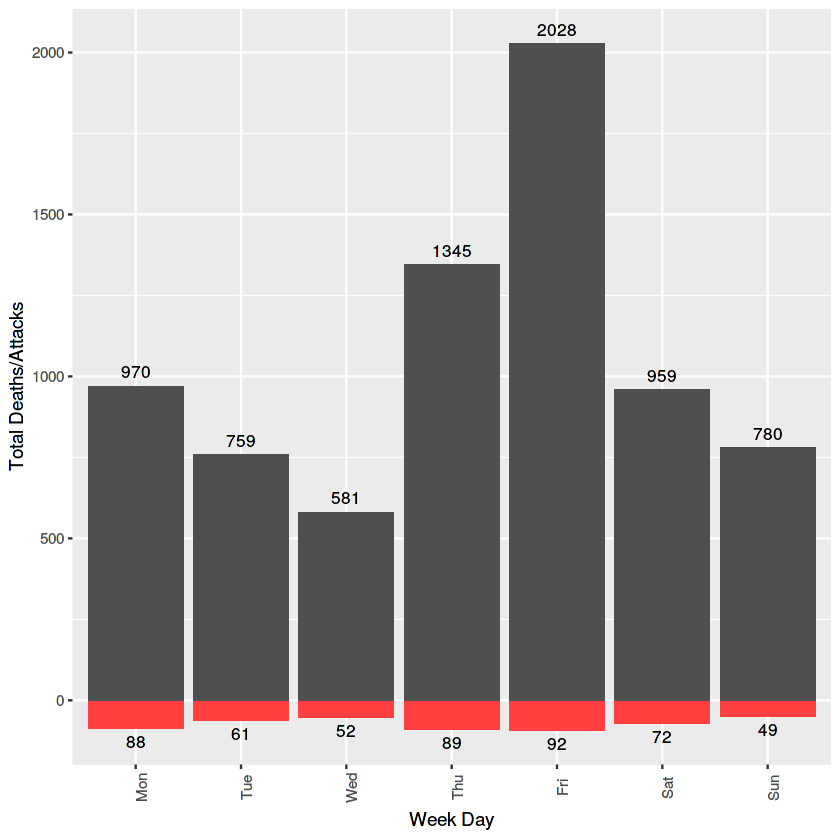

In [27]:
df %>% filter(sa==1) %>% group_by(gr_week_day) %>% summarise(nbr=n(), dead=sum(sa_Killed.Max, na.rm=TRUE)) %>%
ggplot() + labs(x='Week Day', y='Total Deaths/Attacks', fill='type')+
    geom_bar(aes(gr_week_day, -nbr, fill='Deaths') , fill='brown1', stat='identity') + 
    geom_bar(aes(gr_week_day, dead, fill='attacks'), stat='identity', fill='gray31') +
    geom_text(aes(gr_week_day, -nbr, label=nbr), vjust=1.5, size=3.5) + 
    geom_text(aes(gr_week_day, dead, label=dead), vjust=-0.6, size=3.5) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 1))

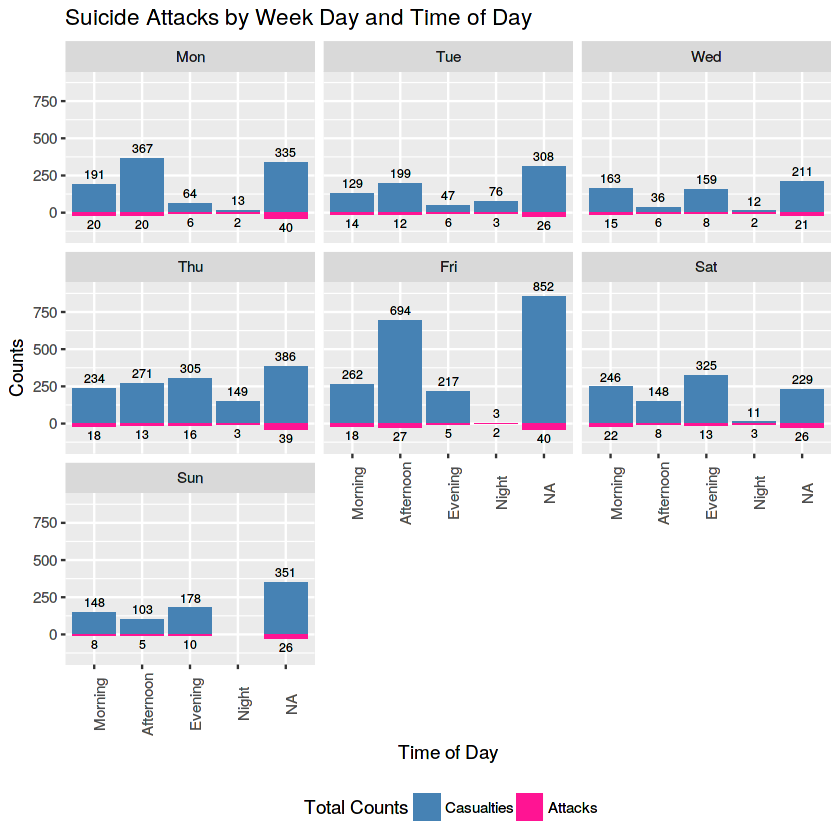

In [28]:
pdf <- df %>% filter(sa==1) %>% group_by(gr_week_day,sa_Time) %>% summarise(nbr=n(), dead=sum(sa_Killed.Max, na.rm=TRUE)) %>% gather('type', 'val', -sa_Time, -gr_week_day)
ggplot(pdf, aes(fill=type)) + 
geom_bar(data=subset(pdf, type=='dead'),aes(x=sa_Time, y=val), stat='identity') +
geom_bar(data=subset(pdf, type=='nbr'),aes(x=sa_Time, y=-val), stat='identity') +
geom_text(data=subset(pdf, type=='nbr'), aes(sa_Time, -val, label=val), vjust=1.5, size=2.5) + 
geom_text(data=subset(pdf, type=='dead'), aes(sa_Time, val, label=val), vjust=-0.6, size=2.5) +
scale_fill_manual(name='Total Counts',labels = c("Casualties", "Attacks"), values = c("steelblue", "deeppink")) +
labs(x='Time of Day', y='Counts', title='Suicide Attacks by Week Day and Time of Day') +
theme(axis.text.x = element_text(angle = 90, vjust = 1), legend.position='bottom') +
ylim(c(-150,900)) +
facet_wrap(~gr_week_day)

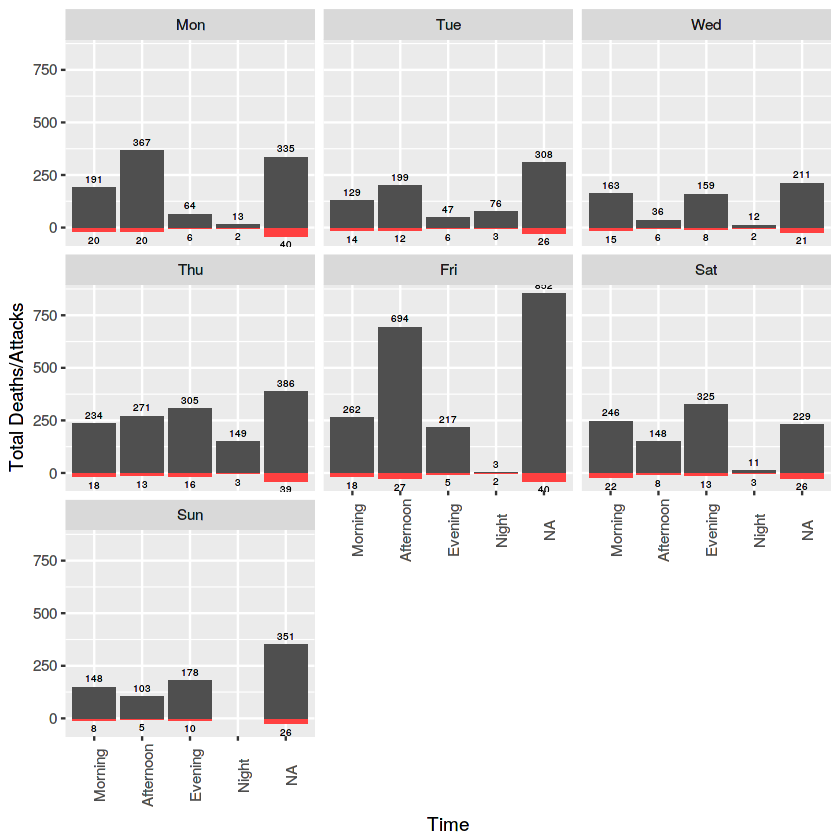

In [29]:
df %>% filter(sa==1) %>% group_by(gr_week_day, sa_Time) %>% summarise(nbr=n(), dead=sum(sa_Killed.Max, na.rm=TRUE)) %>%
ggplot() + labs(x='Time', y='Total Deaths/Attacks', fill='type')+
    geom_bar(aes(sa_Time, -nbr, fill='Deaths') , fill='brown1', stat='identity') + 
    geom_bar(aes(sa_Time, dead, fill='attacks'), stat='identity', fill='gray31') +
    geom_text(aes(sa_Time, -nbr, label=nbr), vjust=1.5, size=2) + 
    geom_text(aes(sa_Time, dead, label=dead), vjust=-0.6, size=2) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 1)) + facet_wrap(~gr_week_day)

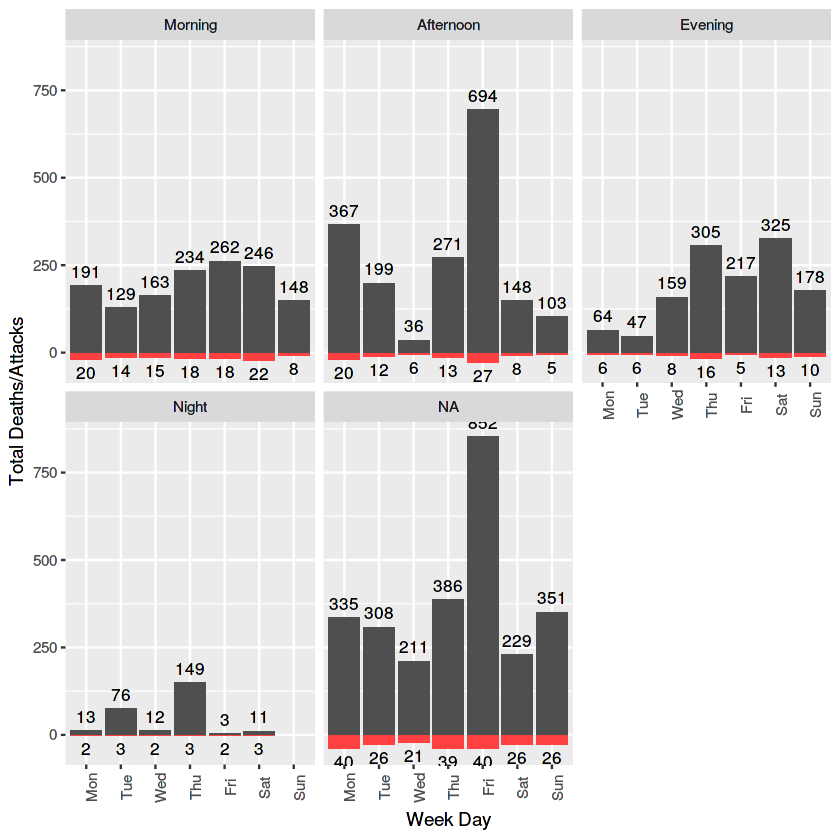

In [30]:
df %>% filter(sa==1) %>% group_by(sa_Time, gr_week_day) %>% summarise(nbr=n(), dead=sum(sa_Killed.Max, na.rm=TRUE)) %>%
ggplot() + labs(x='Week Day', y='Total Deaths/Attacks', fill='type')+
    geom_bar(aes(gr_week_day, -nbr, fill='Deaths') , fill='brown1', stat='identity') + 
    geom_bar(aes(gr_week_day, dead, fill='attacks'), stat='identity', fill='gray31') +
    geom_text(aes(gr_week_day, -nbr, label=nbr), vjust=1.5, size=3.5) + 
    geom_text(aes(gr_week_day, dead, label=dead), vjust=-0.6, size=3.5) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 1)) + facet_wrap(~sa_Time)

In [31]:
names(df)

[1] "X"                        "Date"                    
 [3] "sa_Blast.Day.Type"        "sa_Time"                 
 [5] "sa_City"                  "sa_Latitude"             
 [7] "sa_Longitude"             "sa_Province"             
 [9] "sa_Location.Category"     "sa_Open.Closed.Space"    
[11] "sa_Target.Type"           "sa_Targeted.Sect.if.any" 
[13] "sa_Killed.Max"            "sa_No..of.Suicide.Blasts"
[15] "sa_isl_day"               "sa_isl_year_AH"          
[17] "sa_isl_month"             "sa"                      
[19] "da_Time"                  "da_City"                 
[21] "da_Province"              "da_No.of.Strike"         
[23] "da_Al.Qaeda"              "da_Taliban"              
[25] "da_Civilians.Max"         "da_Foreigners.Max"       
[27] "da_Total.Died.Max"        "da_Women.Children"       
[29] "da_Longitude"             "da_Latitude"             
[31] "da"                       "gr_week_day"             
[33] "gr_day"                   "gr_month"                
[35] "gr_year"

In [ ]:
pdf <- df %>% filter(sa==1) %>% group_by(sa_Target.Type) %>% summarise(nbr=n())
ggplot(pdf) + geom_bar(aes(x=reorder(sa_Target.Type,nbr), y=nbr), stat='identity') + coord_flip()

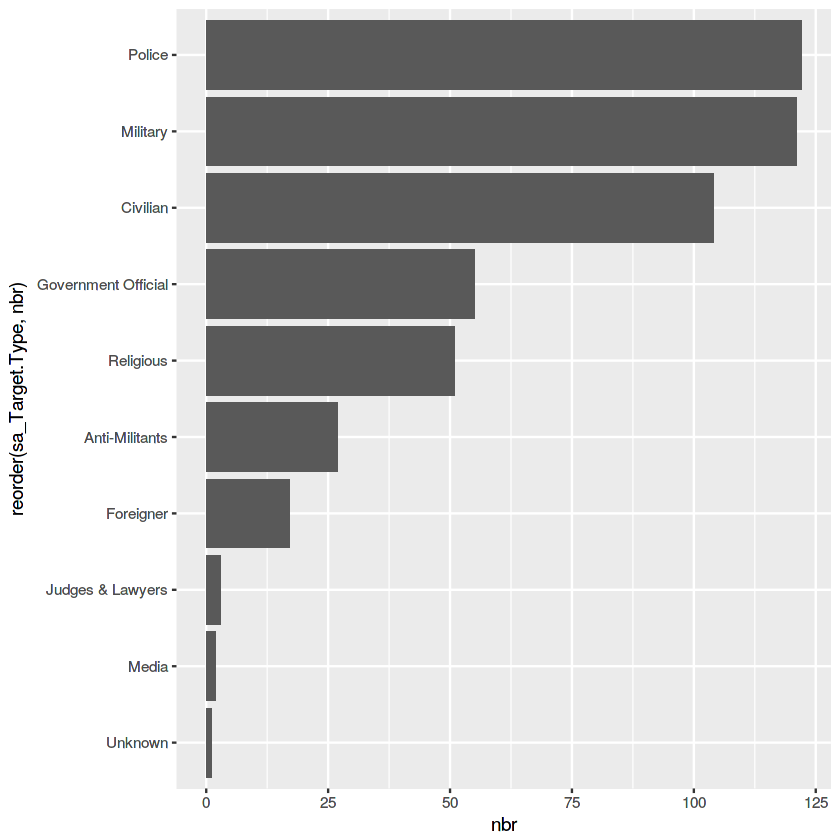

In [32]:
pdf <- df %>% filter(sa==1) %>% group_by(sa_Target.Type) %>% summarise(nbr=n())
ggplot(pdf) + geom_bar(aes(x=reorder(sa_Target.Type,nbr), y=nbr), stat='identity') + coord_flip()

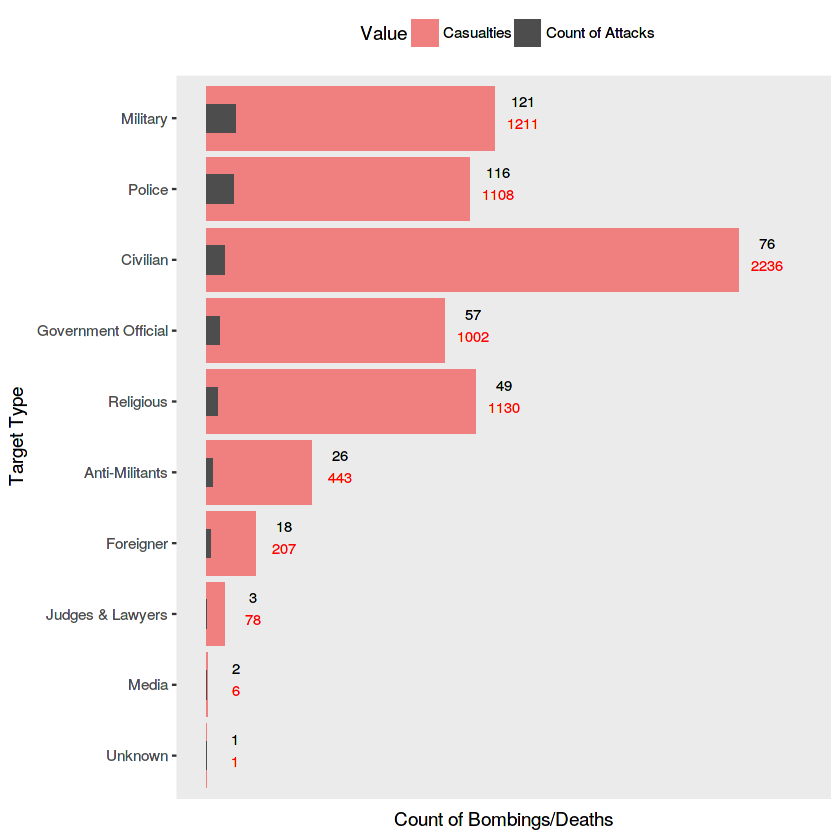

In [194]:
pdf <- df %>% filter(sa==1) %>% group_by(sa_Target.Type) %>% summarise(nbr=sum(sa_No..of.Suicide.Blasts, na.rm=TRUE), dead=sum(sa_Killed.Max, na.rm=TRUE))
    ggplot(pdf) + 
    geom_bar(aes(x=reorder(sa_Target.Type, nbr), y=dead, fill='Casualties'), stat = 'identity')+ 
    geom_bar(aes(x=sa_Target.Type, y=nbr, fill='Count of Attacks'), stat='identity', width=0.4) + 
    geom_text(aes(x=reorder(sa_Target.Type, nbr), y=dead+120, label=dead), vjust=1, size=3, color='red') + 
    geom_text(aes(x=reorder(sa_Target.Type, nbr), y=dead+120, label=nbr), vjust=-1, size=3) + 
    labs(x='Target Type', y='Count of Bombings/Deaths') + coord_flip() +
    ylim(c(0, 2500)) +
    scale_fill_manual(name='Value', values=c('lightcoral', 'gray30')) +
    theme(legend.position='top', panel.grid.major = element_blank(), panel.grid.minor = element_blank(),axis.text.x = element_blank(), axis.ticks.x = element_blank())

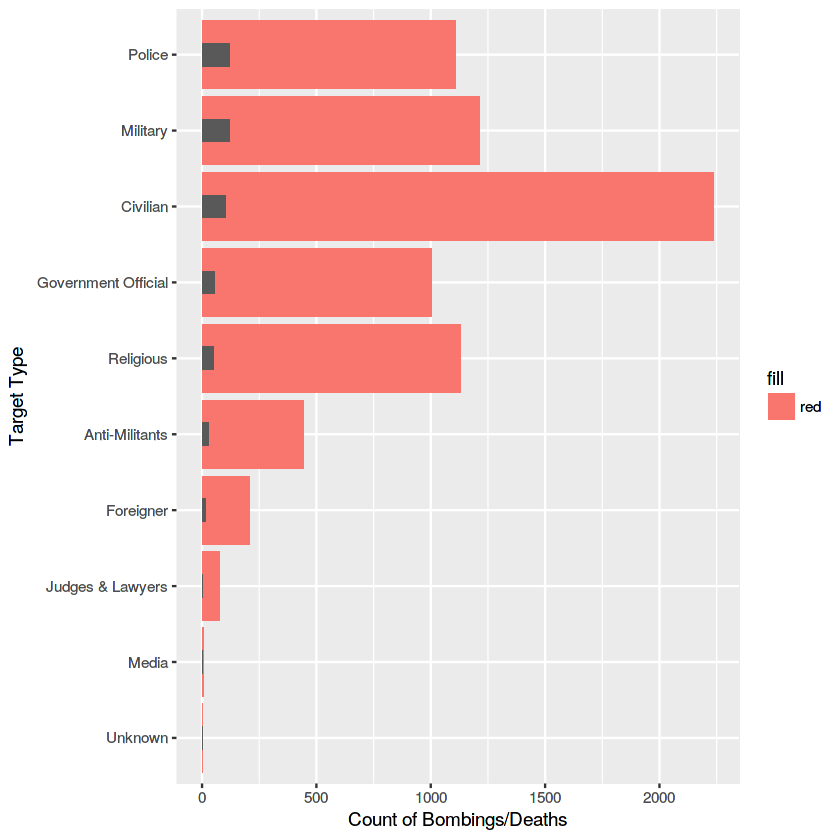

In [33]:
pdf <- df %>% filter(sa==1) %>% group_by(sa_Target.Type) %>% summarise(nbr=n(), dead=sum(sa_Killed.Max, na.rm=TRUE))
    ggplot(pdf) + geom_bar(aes(x=reorder(sa_Target.Type, nbr), y=dead, fill='red'), stat = 'identity')+ 
    geom_bar(aes(x=sa_Target.Type, y=nbr), stat='identity', width=0.3) + 
    labs(x='Target Type', y='Count of Bombings/Deaths') + coord_flip() 

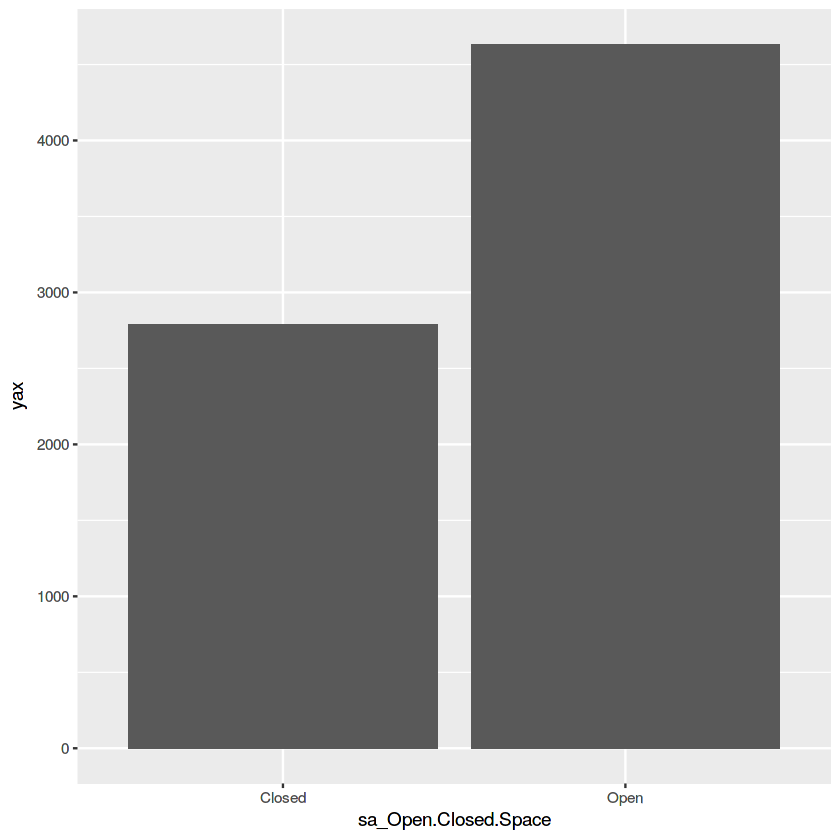

In [34]:
pdf <- df %>% filter(sa==1) %>% group_by(sa_Open.Closed.Space) %>% summarise(yax = sum(sa_Killed.Max, na.rm=TRUE))
ggplot(pdf) + geom_bar(aes(x=sa_Open.Closed.Space, y=yax), stat='identity') 

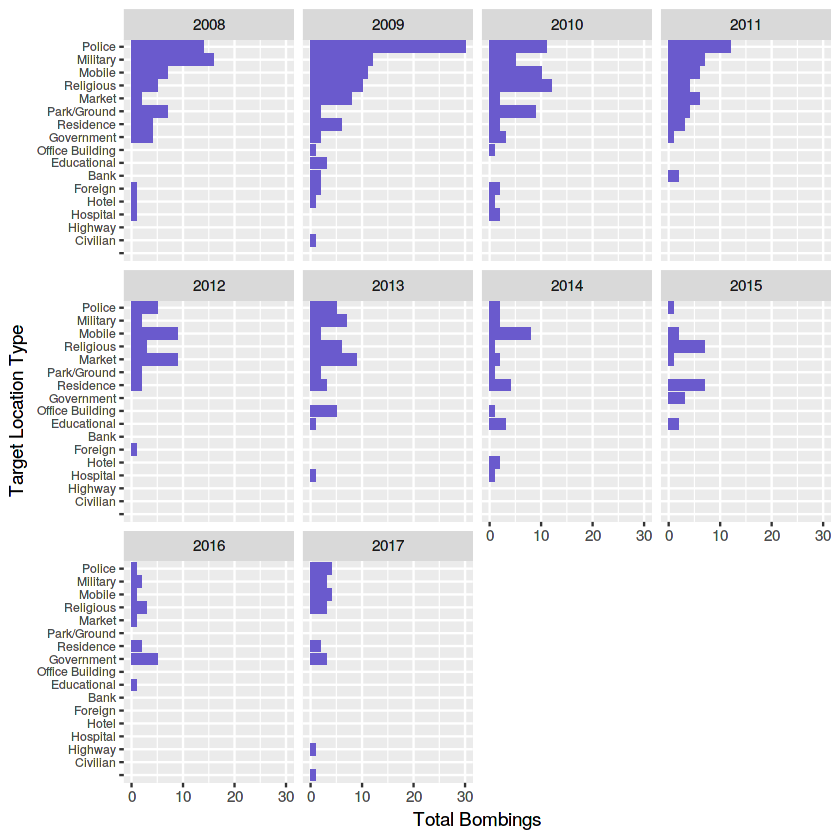

In [200]:
pdf <- df %>% filter(sa==1) %>% group_by(gr_year, sa_Location.Category) %>% summarise(total_bombings = n()) %>% 
filter(gr_year >2007) 
ggplot(pdf) + labs(x='Target Location Type', y='Total Bombings') +
    geom_bar(aes(x=reorder(sa_Location.Category, total_bombings), y=total_bombings), stat='identity', fill='slateblue') + facet_wrap(~gr_year) +
    theme(axis.text.y = element_text(size=7)) + coord_flip() 

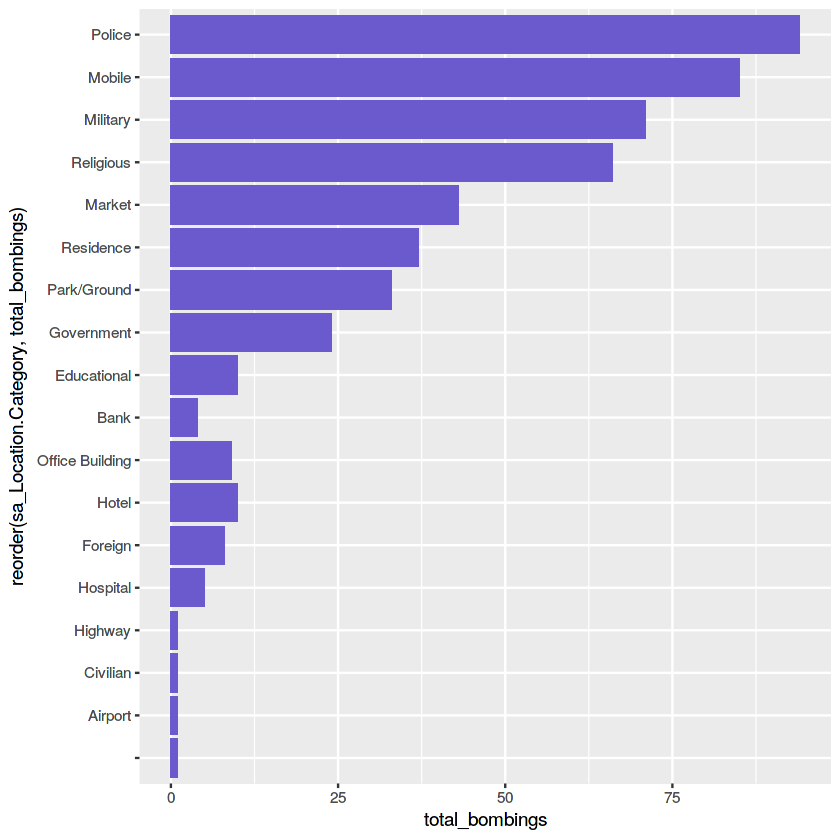

In [146]:
pdf <- df %>% filter(sa==1) %>% group_by(sa_Location.Category, gr_year) %>% summarise(total_bombings = n())
ggplot(pdf) + 
    geom_bar(aes(x=reorder(sa_Location.Category, total_bombings), y=total_bombings), stat='identity', fill='slateblue') + 
    coord_flip()

Using zoom = 6...
Warning message:
: `panel.margin` is deprecated. Please use `panel.spacing` property insteadWarning message:
: Removed 4 rows containing missing values (geom_point).

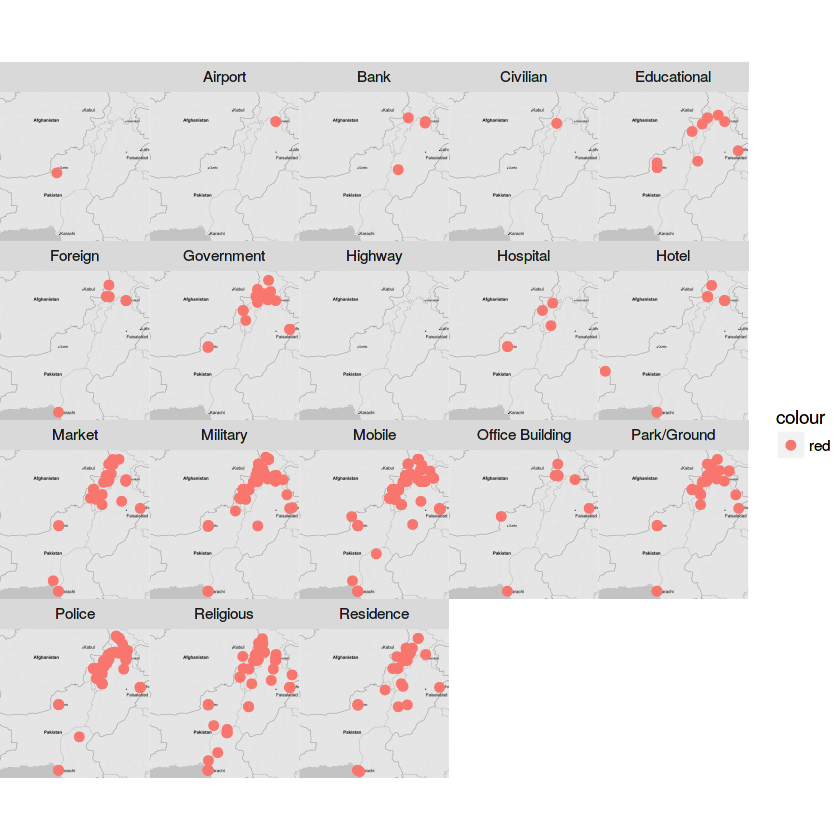

In [158]:
att <- df %>% filter(sa==1) %>% select(sa_Location.Category, sa_Longitude, sa_Latitude)
qmplot(sa_Longitude, sa_Latitude,data=att,color='red',  size=I(2), darken=0.1) + facet_wrap(~sa_Location.Category)

In [148]:
unique(df$sa_Location.Category)

[1] "Foreign"         "Office Building" "Hotel"           "Religious"      
 [5] "Mobile"          "Military"        NA                "Residence"      
 [9] "Park/Ground"     "Market"          "Police"          "Airport"        
[13] "Government"      "Hospital"        "Educational"     "Civilian"       
[17] "Bank"            " "               "Highway"

Using zoom = 6...
Map from URL : http://tile.stamen.com/toner-lite/6/42/25.png
Map from URL : http://tile.stamen.com/toner-lite/6/43/25.png
Map from URL : http://tile.stamen.com/toner-lite/6/44/25.png
Map from URL : http://tile.stamen.com/toner-lite/6/45/25.png
Map from URL : http://tile.stamen.com/toner-lite/6/42/26.png
Map from URL : http://tile.stamen.com/toner-lite/6/43/26.png
Map from URL : http://tile.stamen.com/toner-lite/6/44/26.png
Map from URL : http://tile.stamen.com/toner-lite/6/45/26.png
Map from URL : http://tile.stamen.com/toner-lite/6/42/27.png
Map from URL : http://tile.stamen.com/toner-lite/6/43/27.png
Map from URL : http://tile.stamen.com/toner-lite/6/44/27.png
Map from URL : http://tile.stamen.com/toner-lite/6/45/27.png
Warning message:
: `panel.margin` is deprecated. Please use `panel.spacing` property insteadWarning message:
: Removed 4 rows containing missing values (geom_point).

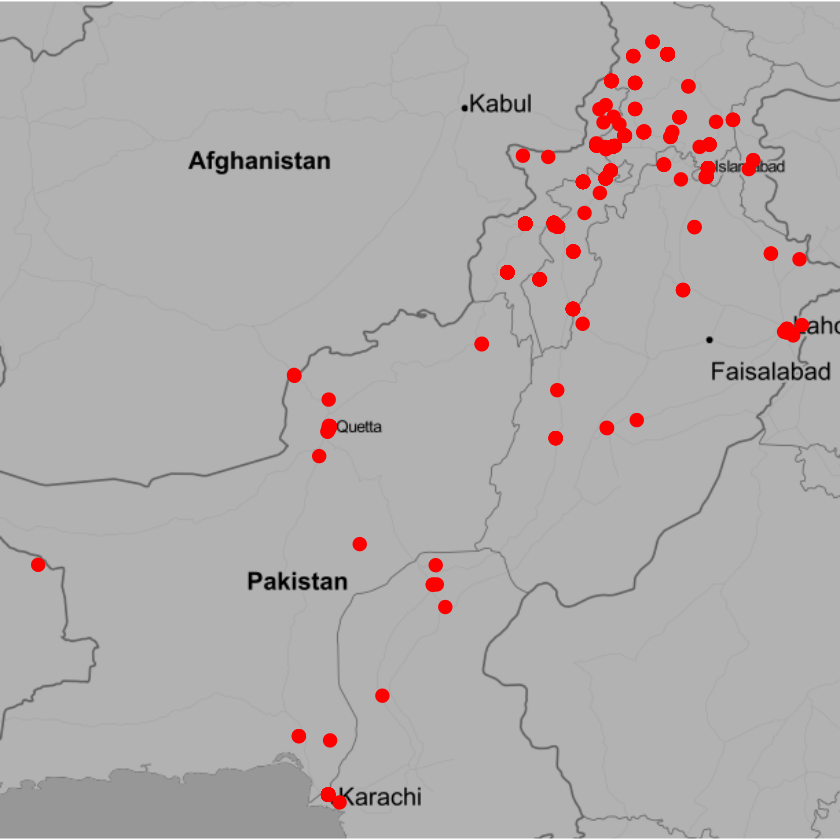

In [37]:
attacks <- df %>% filter(sa==1)

qmplot(sa_Longitude, sa_Latitude, data=attacks, colour = I('red'), size=I(3), darken=0.3)

Using zoom = 4...
Warning message:
: `panel.margin` is deprecated. Please use `panel.spacing` property insteadWarning message:
: Removed 1 rows containing missing values (geom_point).

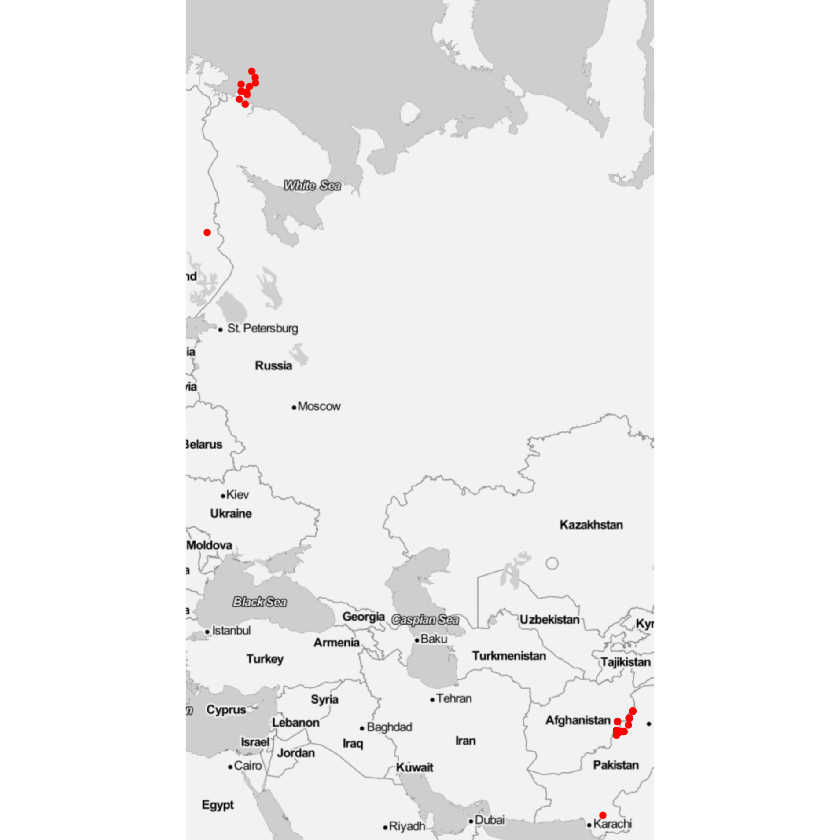

In [47]:
drones <- df %>% filter(da==1)

qmplot(da_Longitude, da_Latitude, data=drones, colour = I('red'), size=I(1), darken=0.05)

In [39]:
df %>% filter(da==1) %>% select(da_Longitude, da_Latitude) %>% summary()

  da_Longitude    da_Latitude   
 Min.   :64.40   Min.   :25.68  
 1st Qu.:69.90   1st Qu.:32.97  
 Median :70.15   Median :32.97  
 Mean   :70.09   Mean   :32.99  
 3rd Qu.:70.15   3rd Qu.:33.03  
 Max.   :71.50   Max.   :34.68  
 NA's   :1       NA's   :1      

In [54]:
df %>% filter(da==1 | sa==1) %>% 
group_by(gr_year, gr_month) %>% 
summarise(sac=n(), sdead=sum(sa_Killed.Max, na.rm=TRUE), sasum=sum(sa, na.rm=TRUE))

gr_year gr_month sac sdead sasum
1   1995    11       1   15    1    
2   2000    11       1    3    1    
3   2002     5       1   15    1    
4   2002     6       1   12    1    
5   2003     7       1   47    1    
6   2003    12       1   18    1    
7   2004     2       1    1    1    
8   2004     5       2   33    2    
9   2004     6       2    2    1    
10  2004     7       2   10    2    
11  2004    10       2   36    2    
12  2005     3       1   50    1    
13  2005     4       1    2    1    
14  2005     5       3   31    2    
15  2005    12       1    0    0    
16  2006     1       2    0    0    
17  2006     2       1   40    1    
18  2006     3       1    5    1    
19  2006     4       1   57    1    
20  2006     6       2   14    2    
21  2006     8       1    1    1    
22  2006    10       1    0    0    
23  2006    11       2   43    2    
24  2006    12       1    1    1    
25  2007     1       4   25    4    
26  2007     2       4   21    4    
27  2007     3       1    2    1    
28  2007     4       2   35    1    
29  2007     5       2   29    2    
30  2007     6       1    0    0    
⋮   ⋮       ⋮        ⋮   ⋮     ⋮    
121 2015     1       6    62   1    
122 2015     2       3    35   3    
123 2015     3       4    20   2    
124 2015     4       1     0   0    
125 2015     5       7    12   4    
126 2015     6       5    27   4    
127 2015     7       1     1   1    
128 2015     8       3    23   2    
129 2015     9       5     6   2    
130 2015    10       3    34   3    
131 2015    12       1    26   1    
132 2016     1       5    27   3    
133 2016     2       1    11   1    
134 2016     3       2    92   2    
135 2016     4       2     3   2    
136 2016     5       2     1   1    
137 2016     8       1    70   1    
138 2016     9       3    50   3    
139 2016    10       1    61   1    
140 2016    11       2    54   2    
141 2017     2       7   107   7    
142 2017     3       1     0   0    
143 2017     4       2     7   1    
144 2017     5       3    32   2    
145 2017     6       2    85   1    
146 2017     7       5    33   4    
147 2017     8       1    15   1    
148 2017     9       1     0   0    
149 2017    10       3    29   2    
150 2017    11       3     9   3

In [41]:
str(df)

'data.frame':	847 obs. of  35 variables:
 $ X                       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date                    : chr  "1995-11-19" "2000-11-06" "2002-05-08" "2002-06-14" ...
 $ sa_Blast.Day.Type       : chr  "Holiday" "Working Day" "Working Day" "Working Day" ...
 $ sa_Time                 : Factor w/ 4 levels "Morning","Afternoon",..: NA NA 1 1 NA 2 NA 2 3 NA ...
 $ sa_City                 : chr  "islamabad" "karachi" "karachi" "karachi" ...
 $ sa_Latitude             : num  33.7 25 25 25 30.2 ...
 $ sa_Longitude            : num  73.1 67 67 67 67 ...
 $ sa_Province             : chr  "Capital" "Sindh" "Sindh" "Sindh" ...
 $ sa_Location.Category    : chr  "Foreign" "Office Building" "Hotel" "Foreign" ...
 $ sa_Open.Closed.Space    : chr  "Closed" "Closed" "Closed" "Closed" ...
 $ sa_Target.Type          : chr  "Foreigner" "Media" "Foreigner" "Foreigner" ...
 $ sa_Targeted.Sect.if.any : chr  "None" "None" "Christian" "Christian" ...
 $ sa_Killed.Max           : int  15 

In [42]:
df %>% filter(da==1) %>% group_by(da_Latitude, da_Longitude) %>% summarise(n())

da_Latitude da_Longitude n()
1  25.67848    68.50235       1
2  28.89618    64.39921       1
3  32.12082    69.58999       1
4  32.29381    70.10500       1
5  32.32024    69.85974       2
6  32.66740    69.85970       1
7  32.70619    69.41578       1
8  32.84444    69.83056       3
9  32.90517    69.74880       1
10 32.97460    70.14550     281
11 32.98610    70.60420       3
12 33.03330    69.90000      92
13 33.14536    70.02923       1
14 33.35869    70.54072       1
15 33.53000    71.06000       1
16 33.69597    70.33607       1
17 33.73217    70.15076       1
18 33.81670    69.96670       3
19 34.09830    71.14810       5
20 34.68330    71.50000       4
21       NA          NA       1

In [44]:
df %>% filter(da_Latitude > 36 & da_Longitude < 60) %>% select(da_Latitude, da_Longitude)

da_Latitude da_Longitude

In [46]:
col <- c('da_Longitude','da_Latitude')
df[which(df$da_Latitude > 36 & df$da_Longitude < 60), col] <- df %>% filter(da_Latitude > 36 & da_Longitude < 60) %>% select(da_Latitude, da_Longitude)

In [47]:
t %>% filter(da==1) %>% group_by(da_Latitude, da_Longitude) %>% summarise(n())

ERROR: Error in UseMethod("filter_"): no applicable method for 'filter_' applied to an object of class "function"


In [ ]:
t %>% filter(da_Latitude > 36 & da_Longitude < 60) %>% select(da_Latitude, da_Longitude)

In [ ]:
drones <- t %>% filter(da==1)

qmplot(da_Longitude, da_Latitude, data=drones, colour = I('red'), size=I(3), darken=0.3)

In [ ]:
a <- geocode('Pakistan')

In [ ]:
a

In [55]:
plt <- df %>% filter(sa==1) %>% select(sa_Longitude, sa_Latitude)
myMap <- get_map(location = a, source="google", maptype="roadmap", zoom=6) 
ggmap(myMap) + geom_point(data=plt)
#"terrain", "satellite", "roadmap", and "hybrid"

ERROR: Error in get_map(location = a, source = "google", maptype = "roadmap", : object 'a' not found


# Maps

In [57]:
lat <- c(24.3539, 35.91869)
long <- c(61.74681, 75.16683)
bbox <- make_bbox(long,lat,f=0.05)
m <- get_map(bbox,maptype="toner-lite",source="stamen")

#ggmap(m)

Map from URL : http://tile.stamen.com/toner-lite/6/42/25.png
Map from URL : http://tile.stamen.com/toner-lite/6/43/25.png
Map from URL : http://tile.stamen.com/toner-lite/6/44/25.png
Map from URL : http://tile.stamen.com/toner-lite/6/45/25.png
Map from URL : http://tile.stamen.com/toner-lite/6/42/26.png
Map from URL : http://tile.stamen.com/toner-lite/6/43/26.png
Map from URL : http://tile.stamen.com/toner-lite/6/44/26.png
Map from URL : http://tile.stamen.com/toner-lite/6/45/26.png
Map from URL : http://tile.stamen.com/toner-lite/6/42/27.png
Map from URL : http://tile.stamen.com/toner-lite/6/43/27.png
Map from URL : http://tile.stamen.com/toner-lite/6/44/27.png
Map from URL : http://tile.stamen.com/toner-lite/6/45/27.png


Warning message:
: Removed 364 rows containing missing values (geom_point).Warning message:
: Removed 459 rows containing missing values (geom_point).

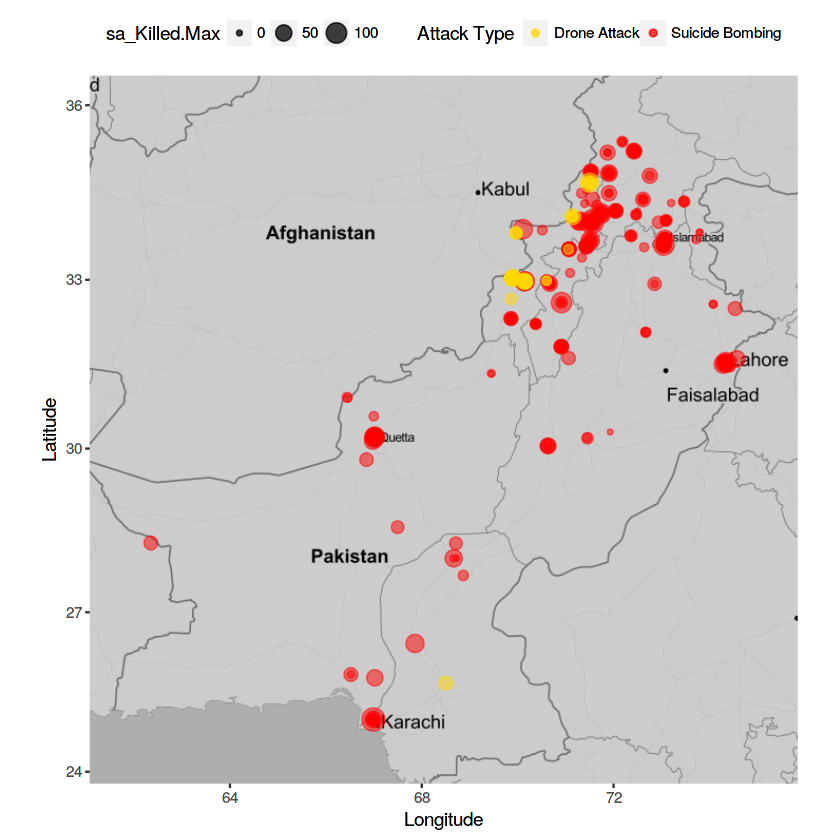

In [58]:
attacks <- df

ggmap(m, darken = 0.2) + 
    geom_point(data=attacks, aes(sa_Longitude, sa_Latitude, size=sa_Killed.Max, color='Suicide Bombing'), alpha=0.5) +
    geom_point(data=attacks, aes(da_Longitude, da_Latitude, size=da_Total.Died.Max, color='Drone Attack'), alpha=0.5) + 
    scale_color_manual(name='Attack Type', values=c('gold', 'red')) + 
    theme(legend.position='top') +
    labs(x='Longitude', y='Latitude')

Warning message:
: Removed 364 rows containing missing values (geom_point).Warning message:
: Removed 445 rows containing missing values (geom_point).

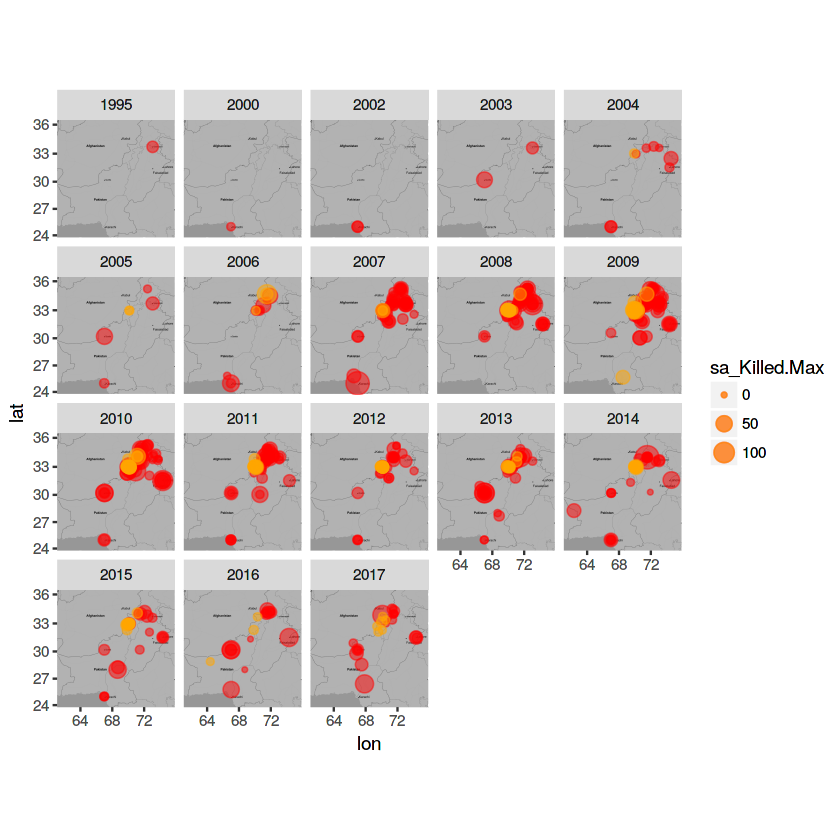

In [58]:
attacks <- df %>% filter(sa==1 | da==1)

ggmap(m, darken=0.3) + 
    geom_point(data=attacks, aes(sa_Longitude, sa_Latitude, size=sa_Killed.Max), color='red', alpha=0.5) +
    geom_point(data=attacks, aes(da_Longitude, da_Latitude, size=da_Total.Died.Max), color='orange', alpha=0.5)+
    facet_wrap(~gr_year)

In [211]:
names(df)

[1] "X"                        "Date"                    
 [3] "sa_Blast.Day.Type"        "sa_Time"                 
 [5] "sa_City"                  "sa_Latitude"             
 [7] "sa_Longitude"             "sa_Province"             
 [9] "sa_Location.Category"     "sa_Open.Closed.Space"    
[11] "sa_Target.Type"           "sa_Targeted.Sect.if.any" 
[13] "sa_Killed.Max"            "sa_No..of.Suicide.Blasts"
[15] "sa_isl_day"               "sa_isl_year_AH"          
[17] "sa_isl_month"             "sa"                      
[19] "da_Time"                  "da_City"                 
[21] "da_Province"              "da_No.of.Strike"         
[23] "da_Al.Qaeda"              "da_Taliban"              
[25] "da_Civilians.Max"         "da_Foreigners.Max"       
[27] "da_Total.Died.Max"        "da_Women.Children"       
[29] "da_Longitude"             "da_Latitude"             
[31] "da"                       "gr_week_day"             
[33] "gr_day"                   "gr_month"                
[35] "gr_year"

In [213]:
sum(df$sa_Killed.Max, na.rm=T)

[1] 7422

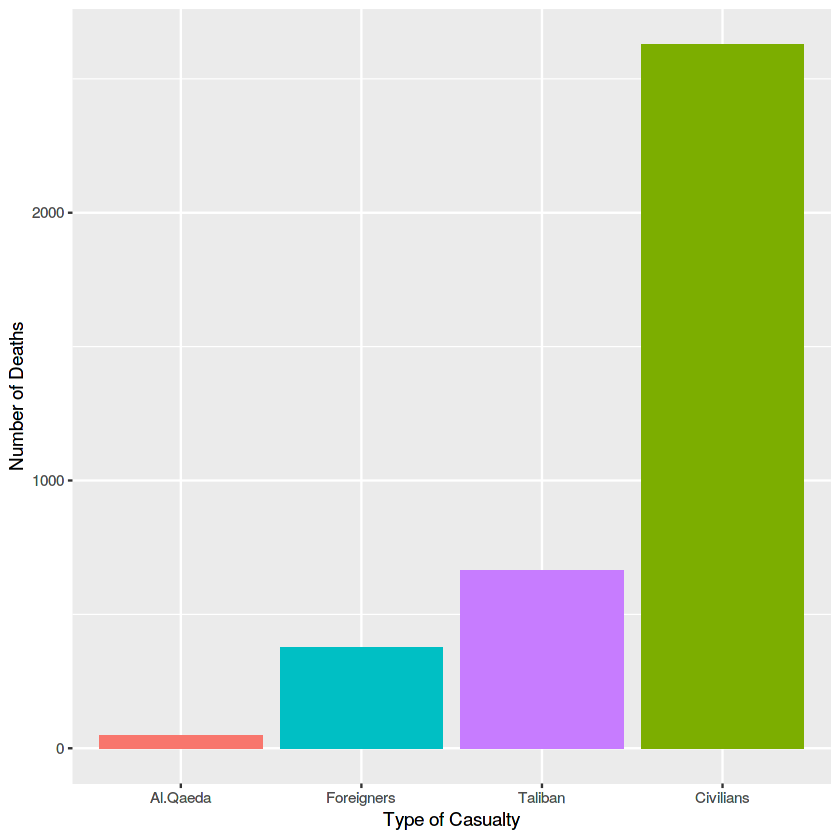

In [141]:
df %>% 
    #creating data for plot
    filter(da==1) %>% 
    select(da_Al.Qaeda ,da_Taliban ,da_Civilians.Max ,da_Foreigners.Max) %>% 
    summarise_all(sum, na.rm=TRUE) %>% 
    gather('type', 'val') %>%
        #plotting the data
        ggplot() + 
        geom_bar(aes(x=reorder(str_replace_all(type, '(da_)|(.Max)',''), val), y=val, fill=str_replace_all(type, '(da_)|(.Max)','')), stat='identity') + 
        labs(x='Type of Casualty', y='Number of Deaths', fill='Type of Casualty') +
        theme(legend.position='none')

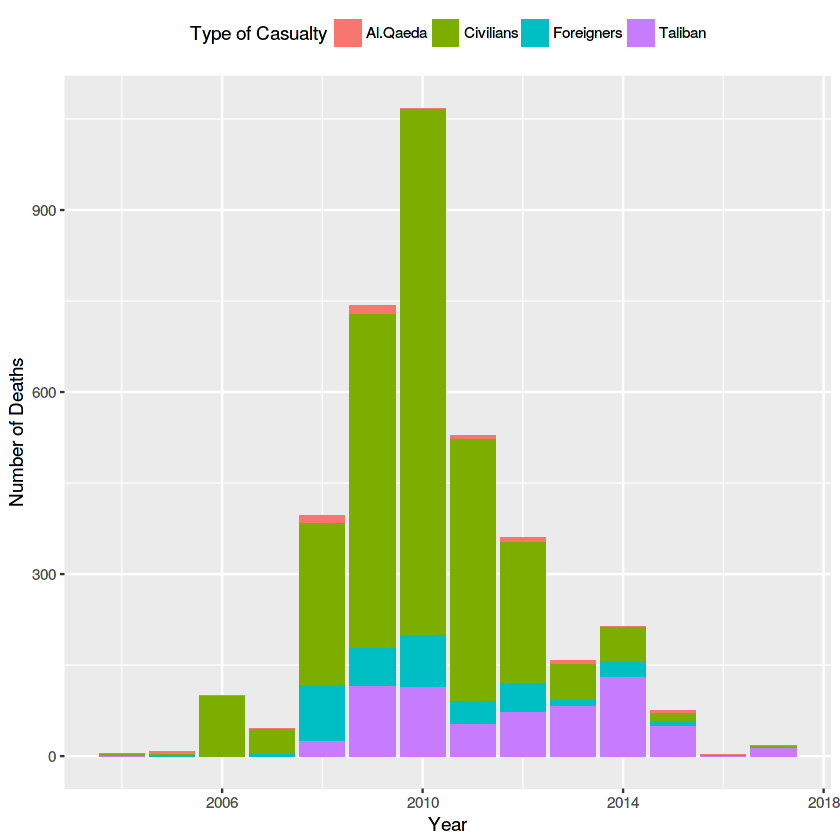

In [139]:
df %>% 
    #creating data for plot
    filter(da==1) %>% 
    select(gr_year, da_Al.Qaeda ,da_Taliban ,da_Civilians.Max ,da_Foreigners.Max) %>% 
    group_by(gr_year) %>% 
    summarise_all(sum, na.rm=TRUE) %>% 
    gather('type', 'val', -gr_year) %>%
        #plotting the data
        ggplot() + 
        geom_bar(aes(x=gr_year, y=val, fill=str_replace_all(type, '(da_)|(.Max)','')), stat='identity', position='stack') + 
        labs(x='Year', y='Number of Deaths', fill='Type of Casualty') +
        theme(legend.position='top')

Warning message:
: Removed 20 rows containing missing values (geom_point).

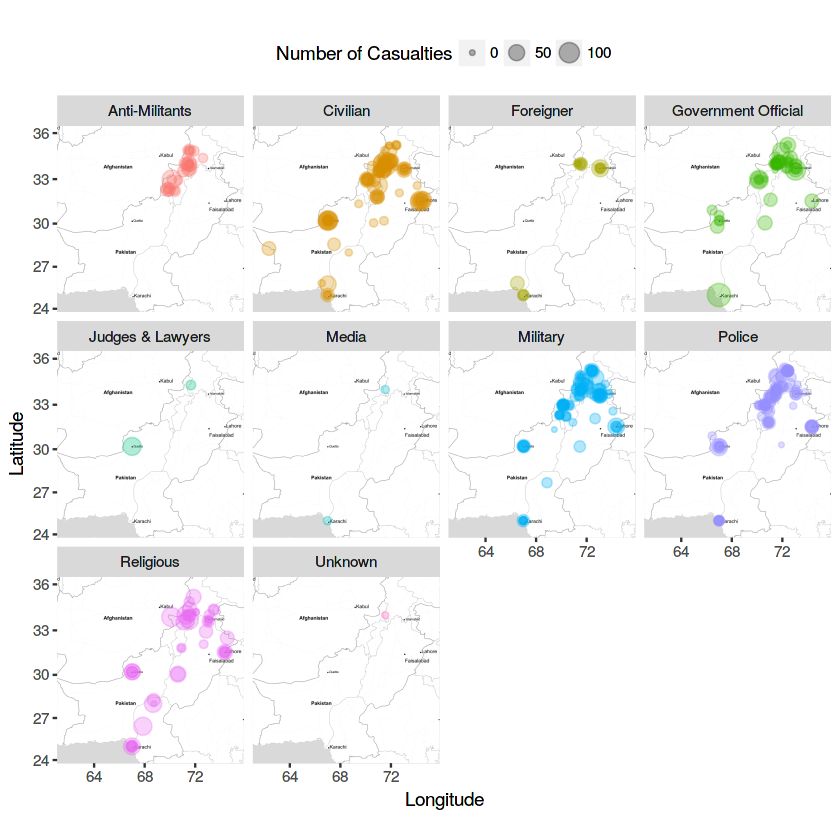

In [205]:
attacks <- df %>% filter(sa==1)

ggmap(m) + 
    labs(x='Longitude', y='Latitude', color='Target Type', size='Number of Casualties') +
    geom_point(data=attacks, aes(sa_Longitude, sa_Latitude, size=sa_Killed.Max, color=sa_Target.Type), alpha=0.3) +
    facet_wrap(~sa_Target.Type) + 
    guides(color=FALSE) +
    theme(legend.position='top')

Warning message:
: Removed 4 rows containing missing values (geom_point).

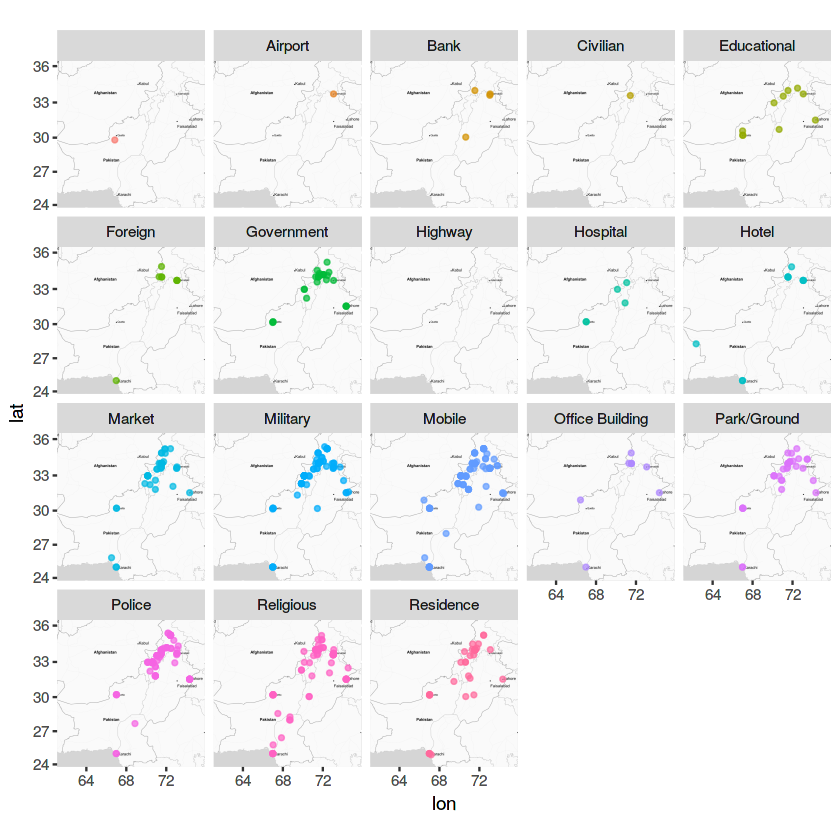

In [166]:
att <- df %>% filter(sa==1) %>% select(sa_Location.Category, sa_Longitude, sa_Latitude) 

ggmap(m, darken = 0.02) + 
    geom_point(data=att, aes(sa_Longitude, sa_Latitude, color=sa_Location.Category), size=1, alpha=0.7) + 
    facet_wrap(~sa_Location.Category) + 
    guides(color=FALSE)

Warning message:
: Removed 1 rows containing missing values (geom_point).

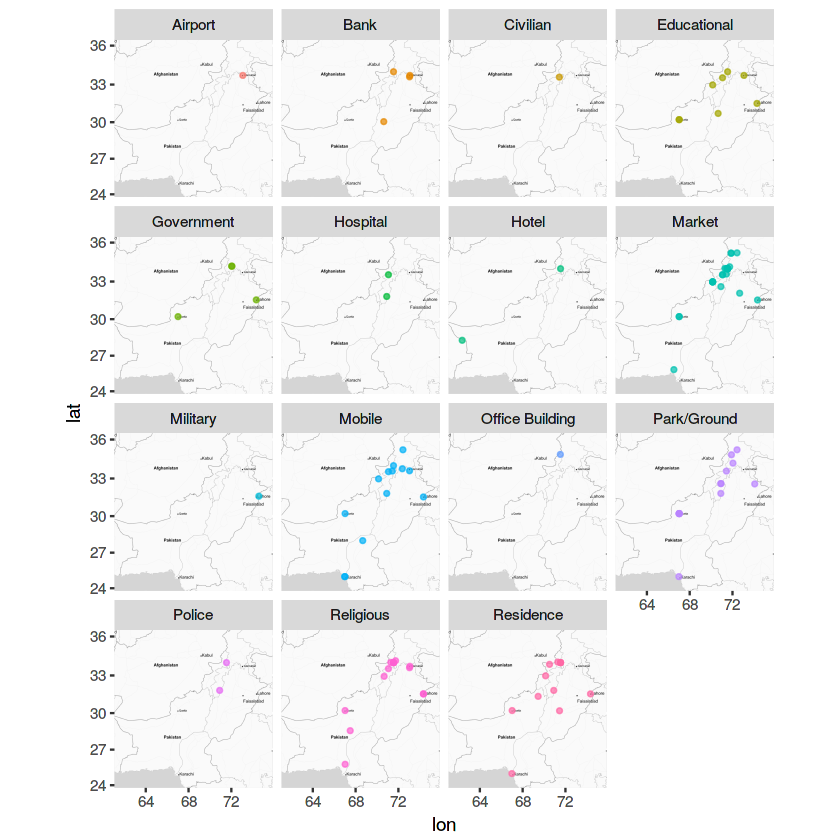

In [167]:
att <- df %>% filter(sa==1 & sa_Target.Type=='Civilian') %>% select(sa_Location.Category, sa_Longitude, sa_Latitude) 

ggmap(m, darken = 0.02) + 
    geom_point(data=att, aes(sa_Longitude, sa_Latitude, color=sa_Location.Category), size=1, alpha=0.7) + 
    facet_wrap(~sa_Location.Category) + 
    guides(color=FALSE)

Warning message:
: Removed 6 rows containing missing values (geom_point).

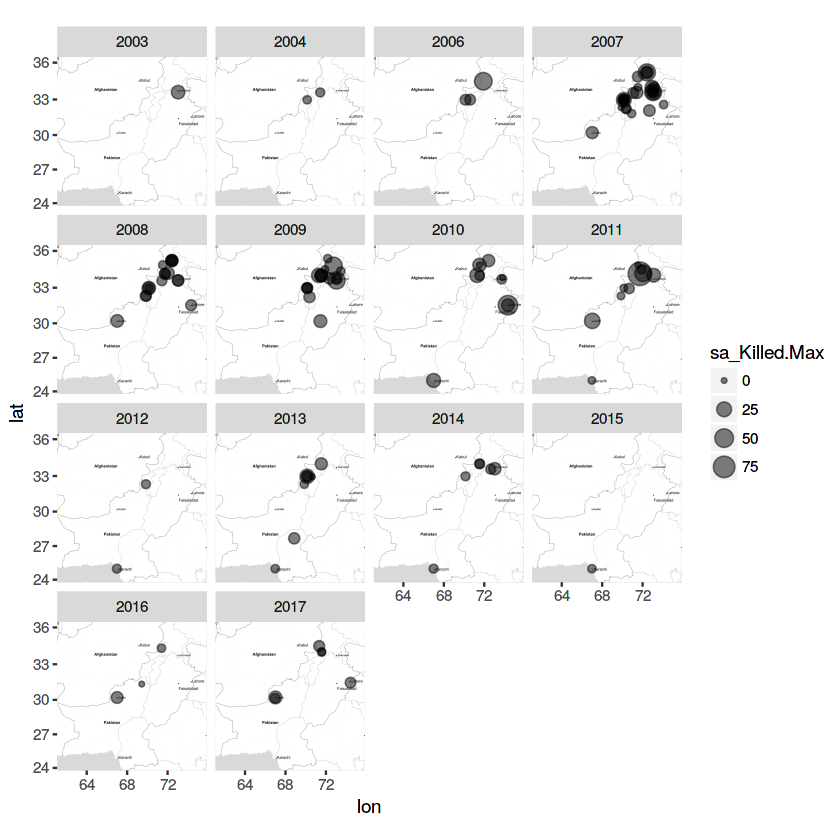

In [60]:
attacks <- df %>% filter(sa==1 & sa_Target.Type=='Military')

ggmap(m) + 
    geom_point(data=attacks, aes(sa_Longitude, sa_Latitude, size=sa_Killed.Max), alpha=0.5) +
    facet_wrap(~gr_year)

Warning message:
: Removed 20 rows containing missing values (geom_point).

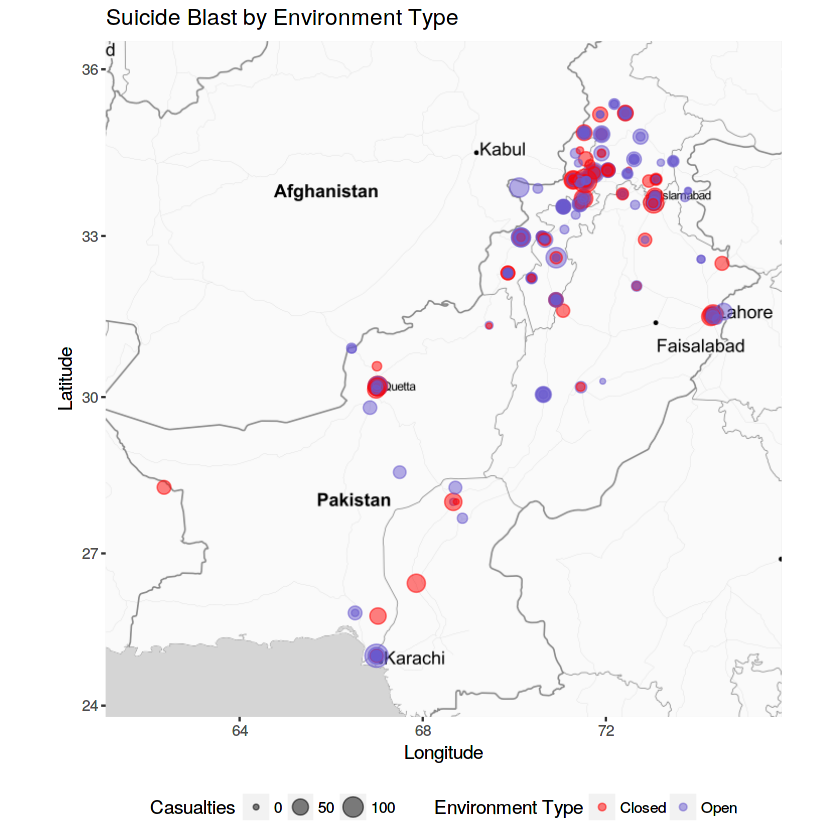

In [143]:
attacks <- df %>% filter(sa==1)

ggmap(m, darken=0.02) + 
    labs(x='Longitude', y='Latitude', size='Casualties', color='Environment Type', title='Suicide Blast by Environment Type') +
    geom_point(data=attacks, aes(sa_Longitude, sa_Latitude, size=sa_Killed.Max, color=sa_Open.Closed.Space), alpha=0.5, position='jitter') +
    scale_color_manual(values=c('red', 'slateblue')) + 
    theme(legend.position='bottom')

In [62]:
str(df)

'data.frame':	847 obs. of  35 variables:
 $ X                       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date                    : chr  "1995-11-19" "2000-11-06" "2002-05-08" "2002-06-14" ...
 $ sa_Blast.Day.Type       : chr  "Holiday" "Working Day" "Working Day" "Working Day" ...
 $ sa_Time                 : Factor w/ 4 levels "Morning","Afternoon",..: NA NA 1 1 NA 2 NA 2 3 NA ...
 $ sa_City                 : chr  "islamabad" "karachi" "karachi" "karachi" ...
 $ sa_Latitude             : num  33.7 25 25 25 30.2 ...
 $ sa_Longitude            : num  73.1 67 67 67 67 ...
 $ sa_Province             : chr  "Capital" "Sindh" "Sindh" "Sindh" ...
 $ sa_Location.Category    : chr  "Foreign" "Office Building" "Hotel" "Foreign" ...
 $ sa_Open.Closed.Space    : chr  "Closed" "Closed" "Closed" "Closed" ...
 $ sa_Target.Type          : chr  "Foreigner" "Media" "Foreigner" "Foreigner" ...
 $ sa_Targeted.Sect.if.any : chr  "None" "None" "Christian" "Christian" ...
 $ sa_Killed.Max           : int  15 

In [67]:
names(df)

[1] "X"                        "Date"                    
 [3] "sa_Blast.Day.Type"        "sa_Time"                 
 [5] "sa_City"                  "sa_Latitude"             
 [7] "sa_Longitude"             "sa_Province"             
 [9] "sa_Location.Category"     "sa_Open.Closed.Space"    
[11] "sa_Target.Type"           "sa_Targeted.Sect.if.any" 
[13] "sa_Killed.Max"            "sa_No..of.Suicide.Blasts"
[15] "sa_isl_day"               "sa_isl_year_AH"          
[17] "sa_isl_month"             "sa"                      
[19] "da_Time"                  "da_City"                 
[21] "da_Province"              "da_No.of.Strike"         
[23] "da_Al.Qaeda"              "da_Taliban"              
[25] "da_Civilians.Max"         "da_Foreigners.Max"       
[27] "da_Total.Died.Max"        "da_Women.Children"       
[29] "da_Longitude"             "da_Latitude"             
[31] "da"                       "gr_week_day"             
[33] "gr_day"                   "gr_month"                
[35] "gr_year"

In [ ]:
em_co[-1,] %>% gather('Country', 'Count', -Year) %>% 
ggplot() + geom_point(aes(x=Year, y=Count, color=Country))